### Code to plot hysteresis for different grain sizes

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy import stats

# turbidity data
turb_SP23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/SP23_clean_complete.csv')
turb_SM23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/SM23_clean_complete.csv')
turb_SM22 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/SM22_clean_complete.csv')
turb_SM21 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/SM21_clean_complete.csv')
# GSD data
GSD_SP23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/grain_size_dist/Spring_2023_watercolumn_percentage.csv')
GSD_SM23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/grain_size_dist/Summer_2023_watercolumn_percentage.csv')
GSD_SM22 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/grain_size_dist/Summer_2022_watercolumn_percentage.csv')
GSD_SM21 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/grain_size_dist/Summer_2021_watercolumn_percentage.csv')
# depth and discharge data
depths2023 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth/2023_water_depth.csv')
depths2022 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth/2022_water_depth.csv')
depths2021 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth/2021_water_depth.csv')
discharge2023 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/hysteresis/discharge_2023.csv')
discharge2022 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/hysteresis/discharge_2022.csv')
discharge2021 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/analysis_by_GSD/hysteresis/discharge_2021.csv')

# suspended sediment concentration data
SSC_SM23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth/SS_summer2023.csv')
SSC_SP23 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth/SS_spring2023.csv')
SSC_SM22 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth/SS_summer2022.csv')
SSC_SM21 = pd.read_csv('C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth/SS_summer2021.csv')
# pending for 2022 and 2021

# Correct datetime conversion and timezone localization
SSC_SM23['Date_Time'] = pd.to_datetime(SSC_SM23['Date_Time']).dt.tz_localize(None)
SSC_SP23['Date_Time'] = pd.to_datetime(SSC_SP23['Date_Time']).dt.tz_localize(None)
SSC_SM22['Date_Time'] = pd.to_datetime(SSC_SM22['Date_Time']).dt.tz_localize(None)
SSC_SM21['Date_Time'] = pd.to_datetime(SSC_SM21['Date_Time']).dt.tz_localize(None)
turb_SP23['DateTime'] = pd.to_datetime(turb_SP23['DateTime']).dt.tz_localize(None)
turb_SM23['DateTime'] = pd.to_datetime(turb_SM23['DateTime']).dt.tz_localize(None)
turb_SM22['DateTime'] = pd.to_datetime(turb_SM22['DateTime']).dt.tz_localize(None)
turb_SM21['DateTime'] = pd.to_datetime(turb_SM21['DateTime']).dt.tz_localize(None)
# convert the column to floats, ignoring errors
SSC_SM23['SSC (mg/L)'] = pd.to_numeric(SSC_SM23['SSC (mg/L)'], errors='coerce')
SSC_SP23['SSC (mg/L)'] = pd.to_numeric(SSC_SP23['SSC (mg/L)'], errors='coerce')
SSC_SM22['SSC (mg/L)'] = pd.to_numeric(SSC_SM22['SSC (mg/L)'], errors='coerce')
SSC_SM21['SSC (mg/L)'] = pd.to_numeric(SSC_SM21['SSC (mg/L)'], errors='coerce')

### Cleanup GSD data

#### Spring

In [2]:
# set first column as index
GSD_SP23.set_index('lab_ID', inplace=True)
# transpose the data
GSD_SP23 = GSD_SP23.T
# separate by upstream and downstream samples for the spring samples
GSD_SP23_up = GSD_SP23[GSD_SP23['sample'].str.startswith('UP')].copy()
GSD_SP23_down = GSD_SP23[GSD_SP23['sample'].str.startswith('D')].copy()
# set date time column in datetime format
GSD_SP23_up.loc[:, 'datetime'] = pd.to_datetime(GSD_SP23_up.loc[:, 'datetime'])
GSD_SP23_down.loc[:, 'datetime'] = pd.to_datetime(GSD_SP23_down.loc[:, 'datetime'])
# sort by date
GSD_SP23_up = GSD_SP23_up.sort_values(by='datetime')
GSD_SP23_down = GSD_SP23_down.sort_values(by='datetime')
# dropping nan values
GSD_SP23_up.replace('-', np.nan, inplace=True)
GSD_SP23_down.replace('-', np.nan, inplace=True)
GSD_SP23_up = GSD_SP23_up.dropna(subset=['sediment (mg)'])
GSD_SP23_down = GSD_SP23_down.dropna(subset=['sediment (mg)'])

## making sure SSC data is compatible with the GSD data
SSC_SP23 = SSC_SP23.drop_duplicates(subset='Date_Time')
# resample the SSC data to every 1min
SSC_SP23_resampled = SSC_SP23.set_index('Date_Time').resample('1T').interpolate() # this is to merge them
# merge SSC dataframes to the GSD dataframes on the same date and time
GSD_SP23_up = pd.merge(GSD_SP23_up, SSC_SP23_resampled, left_on='datetime', right_index=True, how='inner')
GSD_SP23_down = pd.merge(GSD_SP23_down, SSC_SP23_resampled, left_on='datetime', right_index=True, how='inner')

# merge discharge data with the SSC data
discharge2023['Date_Time'] = pd.to_datetime(discharge2023['Date_Time']).dt.tz_localize(None)
discharge2023.set_index('Date_Time', inplace=True)
# resample to every 1 minute and interpolate
discharge2023 = discharge2023.resample('1T').interpolate()
# merge water depth data with the SSC data
depths2023['Date_Time'] = pd.to_datetime(depths2023['Date_Time']).dt.tz_localize(None)
depths2023.set_index('Date_Time', inplace=True)
# resample to every 1 minute and interpolate
depths2023 = depths2023.resample('1T').interpolate()

SSC_SP23 = pd.merge(SSC_SP23, discharge2023['Q'], left_on='Date_Time', right_index=True, how='inner')
SSC_SP23 = pd.merge(SSC_SP23, depths2023['P3'], left_on='Date_Time', right_index=True, how='inner')
GSD_SP23_up = pd.merge(GSD_SP23_up, discharge2023['Q'], left_on='datetime', right_index=True, how='inner')
GSD_SP23_up = pd.merge(GSD_SP23_up, depths2023['P3'], left_on='datetime', right_index=True, how='inner')
GSD_SP23_down = pd.merge(GSD_SP23_down, discharge2023['Q'], left_on='datetime', right_index=True, how='inner')
GSD_SP23_down = pd.merge(GSD_SP23_down, depths2023['P3'], left_on='datetime', right_index=True, how='inner')

In [3]:
# print the SSC (mg/L) columns (one is called SSC (mg/L)_x and the other is called SSC (mg/L)_y)
print(GSD_SP23_down[['SSC (mg/L)_x', 'SSC (mg/L)_y']]) 
# the first corresponds to the actual measured concentrations, whereas the second corresponds to the interpolated values from the turbidity record

    SSC (mg/L)_x  SSC (mg/L)_y
205       23.158      2.105586
206           15     17.306593
222        8.947     12.113447
207          9.5     10.881393
225           23     26.236767
226           15     15.605993
227           10      8.867347
229          3.5      8.958740
234         6.25      6.172633
323           42     37.763840
324       17.419     18.623880
327            6     10.675167
343       22.143     18.243520
344           10     10.692280
345        6.429      6.676220
346           18      8.539780
350       20.667     19.951033
351       11.875     12.868600
356        7.143      6.138367


The first (SSC (mg/L)_x) corresponds to the actual measured concentrations, whereas the second (SSC (mg/L)_y) corresponds to the interpolated values from the turbidity record

#### Summer 2023

In [4]:
# set first column as index
GSD_SM23.set_index('lab_ID', inplace=True)
# transpose the data
GSD_SM23 = GSD_SM23.T
# separate by upstream and downstream samples for the spring samples
GSD_SM23_up = GSD_SM23[GSD_SM23['sample'].str.contains('-U')].copy()
GSD_SM23_down = GSD_SM23[GSD_SM23['sample'].str.contains('-D')].copy()
# set date time column in datetime format
GSD_SM23_up.loc[:, 'datetime'] = pd.to_datetime(GSD_SM23_up.loc[:, 'datetime'])
GSD_SM23_down.loc[:, 'datetime'] = pd.to_datetime(GSD_SM23_down.loc[:, 'datetime'])
# sort by date
GSD_SM23_up = GSD_SM23_up.sort_values(by='datetime')
GSD_SM23_down = GSD_SM23_down.sort_values(by='datetime')
# dropping nan values
GSD_SM23_up.replace('-', np.nan, inplace=True)
GSD_SM23_down.replace('-', np.nan, inplace=True)
GSD_SM23_up = GSD_SM23_up.dropna(subset=['sediment (mg)'])
GSD_SM23_down = GSD_SM23_down.dropna(subset=['sediment (mg)'])

## making sure SSC data is compatible with the GSD data
SSC_SM23 = SSC_SM23.drop_duplicates(subset='Date_Time')
# resample the SSC data to every 1min
SSC_SM23_resampled = SSC_SM23.set_index('Date_Time').resample('1T').interpolate() # this is to merge them

# merge SSC dataframes to the GSD dataframes on the same date and time
GSD_SM23_up = pd.merge(GSD_SM23_up, SSC_SM23_resampled, left_on='datetime', right_index=True, how='inner')
GSD_SM23_down = pd.merge(GSD_SM23_down, SSC_SM23_resampled, left_on='datetime', right_index=True, how='inner')

# converting the SSC (mg/L) column to numeric
GSD_SP23_up['SSC (mg/L)_x'] = pd.to_numeric(GSD_SP23_up['SSC (mg/L)_x'], errors='coerce')
GSD_SP23_down['SSC (mg/L)_x'] = pd.to_numeric(GSD_SP23_down['SSC (mg/L)_x'], errors='coerce')
GSD_SP23_up['SSC (mg/L)_y'] = pd.to_numeric(GSD_SP23_up['SSC (mg/L)_y'], errors='coerce')
GSD_SP23_down['SSC (mg/L)_y'] = pd.to_numeric(GSD_SP23_down['SSC (mg/L)_y'], errors='coerce')
# same for the summer 
GSD_SM23_up['SSC (mg/L)_x'] = pd.to_numeric(GSD_SM23_up['SSC (mg/L)_x'], errors='coerce')
GSD_SM23_down['SSC (mg/L)_x'] = pd.to_numeric(GSD_SM23_down['SSC (mg/L)_x'], errors='coerce')
GSD_SM23_up['SSC (mg/L)_y'] = pd.to_numeric(GSD_SM23_up['SSC (mg/L)_y'], errors='coerce')
GSD_SM23_down['SSC (mg/L)_y'] = pd.to_numeric(GSD_SM23_down['SSC (mg/L)_y'], errors='coerce')

# print the SSC (mg/L) columns (one is called SSC (mg/L)_x and the other is called SSC (mg/L)_y)
print(GSD_SM23_down[['SSC (mg/L)_x', 'SSC (mg/L)_y']]) 

# merge discharges with the SSC data
SSC_SM23 = pd.merge(SSC_SM23, discharge2023['Q'], left_on='Date_Time', right_index=True, how='inner')
SSC_SM23 = pd.merge(SSC_SM23, depths2023['P3'], left_on='Date_Time', right_index=True, how='inner')
GSD_SM23_up = pd.merge(GSD_SM23_up, discharge2023['Q'], left_on='datetime', right_index=True, how='inner')
GSD_SM23_up = pd.merge(GSD_SM23_up, depths2023['P3'], left_on='datetime', right_index=True, how='inner')

     SSC (mg/L)_x  SSC (mg/L)_y
440       110.000    102.021200
441        53.333     96.578800
442        80.000     91.024400
443        43.333     67.307000
444        92.222     51.258000
456        76.154     56.327000
457        41.200     36.296600
458        39.600     31.388200
459        27.600     24.603000
460        20.833     17.576067
484        37.600     30.925400
485        31.538     31.979600
486        28.077     27.930800
487        23.600     24.378600
488        21.176     21.049400


#### Summer 2022

In [5]:
# set first column as index
GSD_SM22.set_index('lab_ID', inplace=True)
# transpose the data
GSD_SM22 = GSD_SM22.T
# separate by upstream and downstream samples for the summer samples
GSD_SM22_down = GSD_SM22[GSD_SM22['sample'].str.startswith('D')].copy()
# set date time column in datetime format
GSD_SM22_down.loc[:, 'datetime'] = pd.to_datetime(GSD_SM22_down.loc[:, 'datetime'])
# sort by date
GSD_SM22_down = GSD_SM22_down.sort_values(by='datetime')
# dropping nan values
GSD_SM22_down.replace('-', np.nan, inplace=True)
GSD_SM22_down = GSD_SM22_down.dropna(subset=['SSC (mg/L)'])

## making sure SSC data is compatible with the GSD data
SSC_SM22 = SSC_SM22.drop_duplicates(subset='Date_Time')
# resample the SSC data to every 1min
SSC_SM22_resampled = SSC_SM22.set_index('Date_Time').resample('1T').interpolate() # this is to merge them
# merge SSC dataframes to the GSD dataframes on the same date and time
GSD_SM22_down = pd.merge(GSD_SM22_down, SSC_SM22_resampled, left_on='datetime', right_index=True, how='inner')
# converting the SSC (mg/L) column to numeric
GSD_SM22_down['SSC (mg/L)_x'] = pd.to_numeric(GSD_SM22_down['SSC (mg/L)_x'], errors='coerce')
GSD_SM22_down['SSC (mg/L)_y'] = pd.to_numeric(GSD_SM22_down['SSC (mg/L)_y'], errors='coerce')

# merge discharge data with the SSC data
discharge2022['Date_Time'] = pd.to_datetime(discharge2022['Date_Time']).dt.tz_localize(None)
discharge2022.set_index('Date_Time', inplace=True)
# resample to every 1 minute and interpolate
discharge2022 = discharge2022.resample('1T').interpolate()
# merge water depth data with the SSC data
depths2022['Date_Time'] = pd.to_datetime(depths2022['Date_Time']).dt.tz_localize(None)
depths2022.set_index('Date_Time', inplace=True)
# resample to every 1 minute and interpolate
depths2022 = depths2022.resample('1T').interpolate()

SSC_SM22 = pd.merge(SSC_SM22, discharge2022['Q'], left_on='Date_Time', right_index=True, how='inner')
SSC_SM22 = pd.merge(SSC_SM22, depths2022['depth'], left_on='Date_Time', right_index=True, how='inner')
GSD_SM22_down = pd.merge(GSD_SM22_down, discharge2022['Q'], left_on='datetime', right_index=True, how='inner')
GSD_SM22_down = pd.merge(GSD_SM22_down, depths2022['depth'], left_on='datetime', right_index=True, how='inner')
# there's omly data in the downstream reach for 2022

In [6]:
# print the SSC (mg/L) columns (one is called SSC (mg/L)_x and the other is called SSC (mg/L)_y)
print(GSD_SM22_down[['SSC (mg/L)_x', 'SSC (mg/L)_y']]) 
# the first corresponds to the actual measured concentrations, whereas the second corresponds to the interpolated values from the turbidity record

     SSC (mg/L)_x  SSC (mg/L)_y
95        57.7261     47.167000
96        48.0648     42.573600
97        17.4259     15.713200
98        11.4463     22.878200
100        6.5306     11.938533
105       49.0918     27.024600
106       35.3851     49.580200
107       23.6812     25.461400
108        9.8888     12.948400
109        7.9500     10.596267
111        4.0806      7.543067
112        1.6455      5.050733
114        0.8447      3.358667


#### Summer 2021

In [7]:
# set first column as index
GSD_SM21.set_index('lab_ID', inplace=True)
# transpose the data
GSD_SM21 = GSD_SM21.T
# separate by upstream and downstream samples for the spring samples
GSD_SM21_up = GSD_SM21[GSD_SM21['sample'].str.startswith('U')].copy()
GSD_SM21_down = GSD_SM21[GSD_SM21['sample'].str.startswith('D')].copy()
# set date time column in datetime format
GSD_SM21_up.loc[:, 'datetime'] = pd.to_datetime(GSD_SM21_up.loc[:, 'datetime'])
GSD_SM21_down.loc[:, 'datetime'] = pd.to_datetime(GSD_SM21_down.loc[:, 'datetime'])
# sort by date
GSD_SM21_up = GSD_SM21_up.sort_values(by='datetime')
GSD_SM21_down = GSD_SM21_down.sort_values(by='datetime')
# dropping nan values
GSD_SM21_up.replace('-', np.nan, inplace=True)
GSD_SM21_down.replace('-', np.nan, inplace=True)
GSD_SM21_up = GSD_SM21_up.dropna(subset=['SSC (mg/L)'])
GSD_SM21_down = GSD_SM21_down.dropna(subset=['SSC (mg/L)'])

## making sure SSC data is compatible with the GSD data
SSC_SM21 = SSC_SM21.drop_duplicates(subset='Date_Time')
# resample the SSC data to every 1min
SSC_SM21_resampled = SSC_SM21.set_index('Date_Time').resample('1T').interpolate() # this is to merge them
# merge SSC dataframes to the GSD dataframes on the same date and time
GSD_SM21_up = pd.merge(GSD_SM21_up, SSC_SM21_resampled, left_on='datetime', right_index=True, how='inner')
GSD_SM21_down = pd.merge(GSD_SM21_down, SSC_SM21_resampled, left_on='datetime', right_index=True, how='inner')
# converting the SSC (mg/L) column to numeric
GSD_SM21_up['SSC (mg/L)_x'] = pd.to_numeric(GSD_SM21_up['SSC (mg/L)_x'], errors='coerce')
GSD_SM21_down['SSC (mg/L)_x'] = pd.to_numeric(GSD_SM21_down['SSC (mg/L)_x'], errors='coerce')
GSD_SM21_up['SSC (mg/L)_y'] = pd.to_numeric(GSD_SM21_up['SSC (mg/L)_y'], errors='coerce')
GSD_SM21_down['SSC (mg/L)_y'] = pd.to_numeric(GSD_SM21_down['SSC (mg/L)_y'], errors='coerce')

# merge discharge data with the SSC data
discharge2021['Date_Time'] = pd.to_datetime(discharge2021['Date_Time']).dt.tz_localize(None)
discharge2021.set_index('Date_Time', inplace=True)
# resample to every 1 minute and interpolate
discharge2021 = discharge2021.resample('1T').interpolate()
# merge water depth data with the SSC data
depths2021['Date_Time'] = pd.to_datetime(depths2021['Date_Time']).dt.tz_localize(None)
depths2021.set_index('Date_Time', inplace=True)
# resample to every 1 minute and interpolate
depths2021 = depths2021.resample('1T').interpolate()

SSC_SM21 = pd.merge(SSC_SM21, discharge2021['Q'], left_on='Date_Time', right_index=True, how='inner')
SSC_SM21 = pd.merge(SSC_SM21, depths2021['depth'], left_on='Date_Time', right_index=True, how='inner')
GSD_SM21_up = pd.merge(GSD_SM21_up, discharge2021['Q'], left_on='datetime', right_index=True, how='inner')
GSD_SM21_up = pd.merge(GSD_SM21_up, depths2021['depth'], left_on='datetime', right_index=True, how='inner')
GSD_SM21_down = pd.merge(GSD_SM21_down, discharge2021['Q'], left_on='datetime', right_index=True, how='inner')
GSD_SM21_down = pd.merge(GSD_SM21_down, depths2021['depth'], left_on='datetime', right_index=True, how='inner')

In [8]:
# print the SSC (mg/L) columns (one is called SSC (mg/L)_x and the other is called SSC (mg/L)_y)
print(GSD_SM21_down[['SSC (mg/L)_x', 'SSC (mg/L)_y']]) 

            SSC (mg/L)_x  SSC (mg/L)_y
Unnamed: 1       562.326    329.355208
Unnamed: 2       528.035    475.018361
Unnamed: 3       143.169    195.840730
Unnamed: 4        82.761    146.385946
Unnamed: 5        36.920     39.903614
Unnamed: 6        22.012     24.986546


In [9]:
# print the SSC (mg/L) columns (one is called SSC (mg/L)_x and the other is called SSC (mg/L)_y)
print(GSD_SM21_up[['SSC (mg/L)_x', 'SSC (mg/L)_y']]) 

             SSC (mg/L)_x  SSC (mg/L)_y
Unnamed: 7          68.98     22.171118
Unnamed: 8         124.48     37.625738
Unnamed: 9         359.22    407.078508
Unnamed: 10         86.11    137.758236
Unnamed: 11         37.23     65.665794
Unnamed: 12         30.43     29.434789


### Plot turbidity and SSC concentration time series

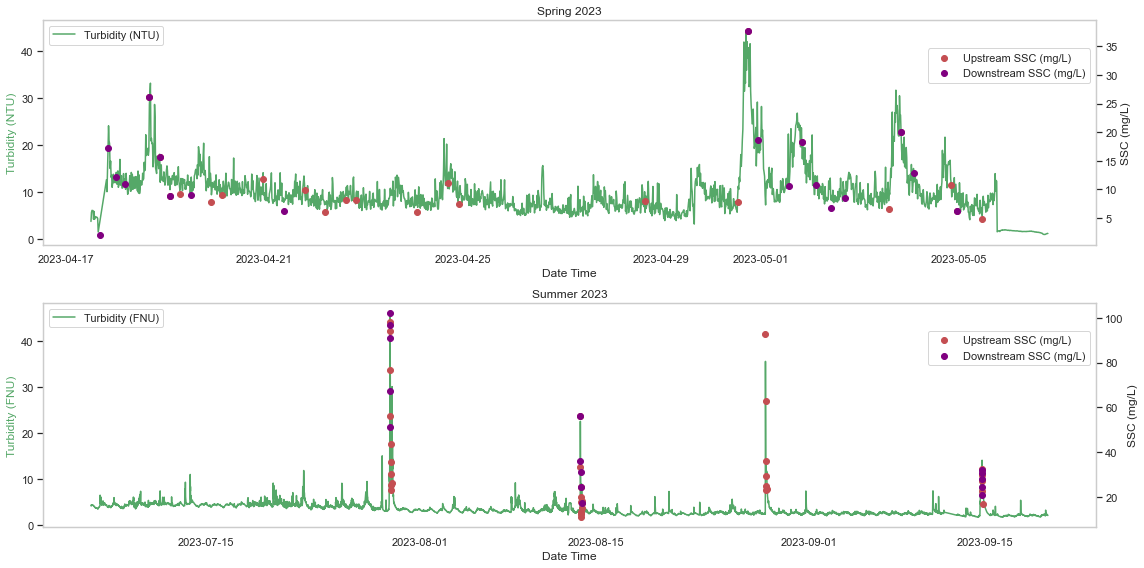

In [10]:
# Plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax1 = plt.subplots(2, 1, figsize=(16, 8)) 

# spring
ax2 = ax1[0].twinx()  # create a second y-axis for the SSC concentration
ax1[0].plot(turb_SP23['DateTime'], turb_SP23['Upstream'], 'g-', label='Turbidity (NTU)')
ax2.scatter(GSD_SP23_up['datetime'], GSD_SP23_up['SSC (mg/L)_y'], c='r', marker='o', label='Upstream SSC (mg/L)')
ax2.scatter(GSD_SP23_down['datetime'], GSD_SP23_down['SSC (mg/L)_y'], c='purple', marker='o', label='Downstream SSC (mg/L)')

ax1[0].set_xlabel('Date Time')
ax1[0].set_ylabel('Turbidity (NTU)', color='g')
ax2.set_ylabel('SSC (mg/L)')
ax1[0].set_title('Spring 2023')
ax1[0].legend(loc='upper left')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9)) 
ax1[0].grid(False)
ax2.grid(False)

# Summer
ax2 = ax1[1].twinx()  # create a second y-axis for the SSC concentration
ax1[1].plot(turb_SM23['DateTime'], turb_SM23['Upstream'], 'g-', label='Turbidity (FNU)')
ax2.scatter(GSD_SM23_up['datetime'], GSD_SM23_up['SSC (mg/L)_y'], c='r', marker='o', label='Upstream SSC (mg/L)')
ax2.scatter(GSD_SM23_down['datetime'], GSD_SM23_down['SSC (mg/L)_y'], c='purple', marker='o', label='Downstream SSC (mg/L)')

ax1[1].set_xlabel('Date Time')
ax1[1].set_ylabel('Turbidity (FNU)', color='g')
ax2.set_ylabel('SSC (mg/L)')
ax1[1].set_title('Summer 2023')
ax1[1].legend(loc='upper left')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
ax1[1].grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()

### Grouping by grain sizes 

In [11]:
# first I need to merge turbidity data with the GSD data
# set date time as index and make sure its in datetime format
turb_SP23['DateTime'] = pd.to_datetime(turb_SP23['DateTime'])
turb_SM23['DateTime'] = pd.to_datetime(turb_SM23['DateTime'])
turb_SM22['DateTime'] = pd.to_datetime(turb_SM22['DateTime'])
turb_SM21['DateTime'] = pd.to_datetime(turb_SM21['DateTime'])
# resample the turbidity data to every 1 minute
turb_SP23 = turb_SP23.drop_duplicates(subset='DateTime').set_index('DateTime').resample('1T').interpolate()
turb_SM23 = turb_SM23.drop_duplicates(subset='DateTime').set_index('DateTime').resample('1T').interpolate()
turb_SM22 = turb_SM22.drop_duplicates(subset='DateTime').set_index('DateTime').resample('1T').interpolate()
turb_SM21 = turb_SM21.drop_duplicates(subset='DateTime').set_index('DateTime').resample('1T').interpolate()
# merge the turbidity data with the GSD data
GSD_SP23_up = pd.merge(GSD_SP23_up, turb_SP23, left_on='datetime', right_index=True, how='inner')
GSD_SM23_up = pd.merge(GSD_SM23_up, turb_SM23, left_on='datetime', right_index=True, how='inner')
GSD_SM22_down = pd.merge(GSD_SM22_down, turb_SM22, left_on='datetime', right_index=True, how='inner')
GSD_SM21_down = pd.merge(GSD_SM21_down, turb_SM21, left_on='datetime', right_index=True, how='inner')
# change the turbidity column name to avoid confusion
GSD_SP23_up.rename(columns={'Upstream': 'Turbidity (NTU)'}, inplace=True)
GSD_SM23_up.rename(columns={'Upstream': 'Turbidity (FNU)'}, inplace=True)
GSD_SM22_down.rename(columns={'Upstream': 'Turbidity (FNU)'}, inplace=True)
GSD_SM21_down.rename(columns={'Upstream': 'Turbidity (FNU)'}, inplace=True)

#### Spring (2023)

In [12]:
# convert columns to numeric, coercing errors to NaN, then filling NaN with 0
for col in range(6, 49):  # this is the range my GS data is in
    GSD_SP23_up.iloc[:, col] = pd.to_numeric(GSD_SP23_up.iloc[:, col], errors='coerce').fillna(0)

# sum values for each sediment type based on the provided column ranges
GSD_SP23_up['Clay'] = GSD_SP23_up.iloc[:, 6:17].sum(axis=1)
GSD_SP23_up['Silt'] = GSD_SP23_up.iloc[:, 17:31].sum(axis=1)
GSD_SP23_up['Fine_Sand'] = GSD_SP23_up.iloc[:, 31:45].sum(axis=1)
GSD_SP23_up['Coarse_Sand'] = GSD_SP23_up.iloc[:, 45:49].sum(axis=1)

# those are just percentages, so I need to multiply them by the SSC values 
GSD_SP23_up['Clay'] = GSD_SP23_up['Clay'] * GSD_SP23_up['SSC (mg/L)_x']
GSD_SP23_up['Silt'] = GSD_SP23_up['Silt'] * GSD_SP23_up['SSC (mg/L)_x']
GSD_SP23_up['Fine_Sand'] = GSD_SP23_up['Fine_Sand'] * GSD_SP23_up['SSC (mg/L)_x']
GSD_SP23_up['Coarse_Sand'] = GSD_SP23_up['Coarse_Sand'] * GSD_SP23_up['SSC (mg/L)_x']

# calculate fine over sand ratio
GSD_SP23_up['Fine/Sand'] = (GSD_SP23_up['Clay'] + GSD_SP23_up['Silt']) / (GSD_SP23_up['Fine_Sand'] + GSD_SP23_up['Coarse_Sand'])

In [20]:
# convert columns to numeric, coercing errors to NaN, then filling NaN with 0
for col in range(6, 49):  # this is the range my GS data is in
    GSD_SP23_down.iloc[:, col] = pd.to_numeric(GSD_SP23_down.iloc[:, col], errors='coerce').fillna(0)

# sum values for each sediment type based on the provided column ranges
GSD_SP23_down['Clay'] = GSD_SP23_down.iloc[:, 6:17].sum(axis=1)
GSD_SP23_down['Silt'] = GSD_SP23_down.iloc[:, 17:31].sum(axis=1)
GSD_SP23_down['Fine_Sand'] = GSD_SP23_down.iloc[:, 31:45].sum(axis=1)
GSD_SP23_down['Coarse_Sand'] = GSD_SP23_down.iloc[:, 45:49].sum(axis=1)

# those are just percentages, so I need to multiply them by the SSC values 
GSD_SP23_down['Clay'] = GSD_SP23_down['Clay'] * GSD_SP23_down['SSC (mg/L)_x']
GSD_SP23_down['Silt'] = GSD_SP23_down['Silt'] * GSD_SP23_down['SSC (mg/L)_x']
GSD_SP23_down['Fine_Sand'] = GSD_SP23_down['Fine_Sand'] * GSD_SP23_down['SSC (mg/L)_x']
GSD_SP23_down['Coarse_Sand'] = GSD_SP23_down['Coarse_Sand'] * GSD_SP23_down['SSC (mg/L)_x']

Plot spring by grain size

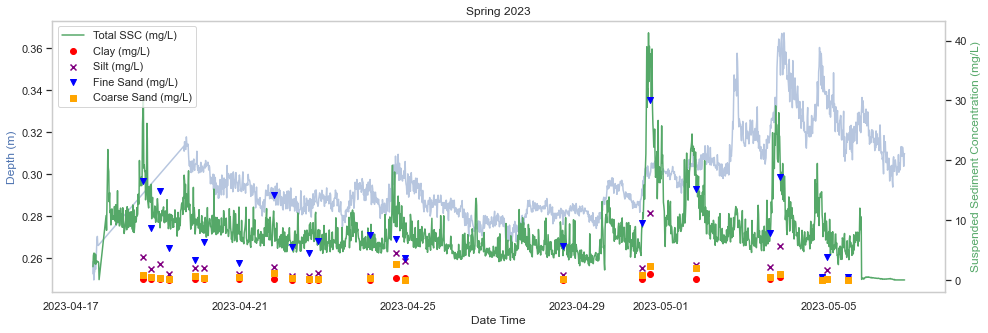

In [13]:
# Plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

# plot water depth
ax.plot(SSC_SP23['Date_Time'], SSC_SP23['P3'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(SSC_SP23['Date_Time'], SSC_SP23['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(GSD_SP23_up['datetime'], GSD_SP23_up['Clay'], c='red', marker='o', label='Clay (mg/L)', zorder=3)
ax2.scatter(GSD_SP23_up['datetime'], GSD_SP23_up['Silt'], c='purple', marker='x', label='Silt (mg/L)', zorder=4)
ax2.scatter(GSD_SP23_up['datetime'], GSD_SP23_up['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)', zorder=5)
ax2.scatter(GSD_SP23_up['datetime'], GSD_SP23_up['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)', zorder=6)

ax.set_xlabel('Date Time')
ax.set_ylabel('Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Spring 2023')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

Time series plot by grain sizes (separated)

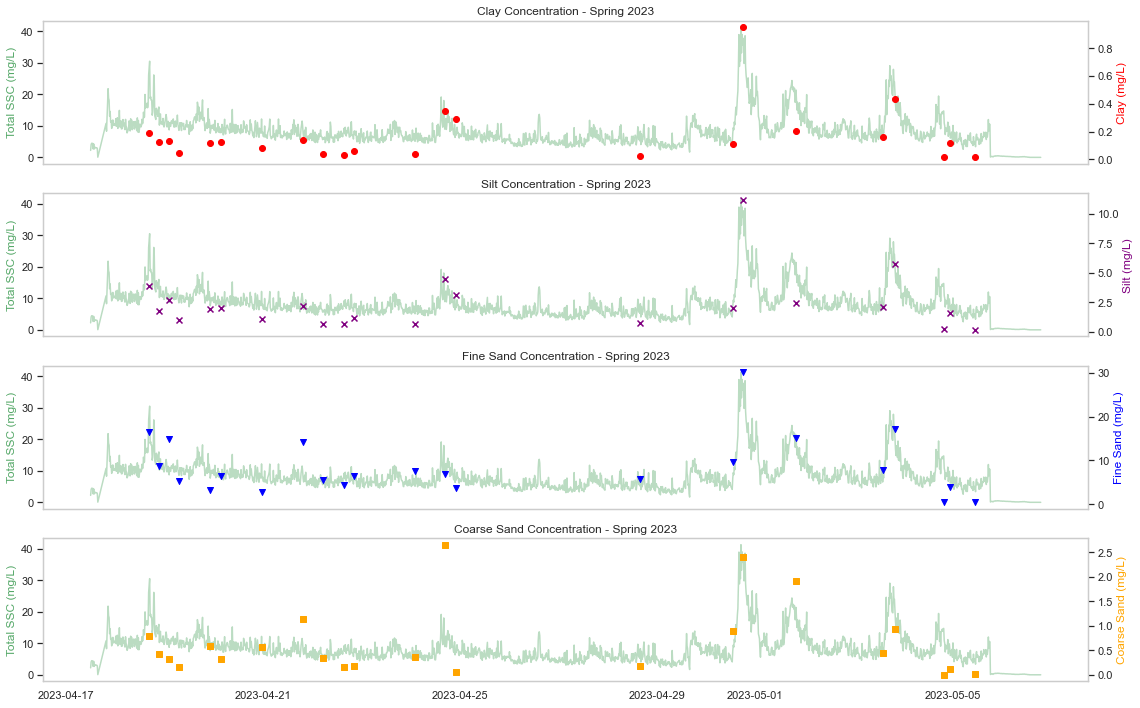

In [14]:
sns.set(style='whitegrid')
fig, axs = plt.subplots(4, 1, figsize=(16, 10), sharex=True)

# plot for clay
axs[0].plot(SSC_SP23['Date_Time'], SSC_SP23['SSC (mg/L)'], 'g-', alpha=0.4, zorder=1)
axs_clay = axs[0].twinx()
axs_clay.scatter(GSD_SP23_up['datetime'], GSD_SP23_up['Clay'], c='red', marker='o', label='Clay (mg/L)', zorder=3)
axs_clay.set_ylabel('Clay (mg/L)', color='red')
axs[0].set_title('Clay Concentration - Spring 2023')
# plot for silt
axs[1].plot(SSC_SP23['Date_Time'], SSC_SP23['SSC (mg/L)'], 'g-', alpha=0.4, zorder=1)
axs_silt = axs[1].twinx()
axs_silt.scatter(GSD_SP23_up['datetime'], GSD_SP23_up['Silt'], c='purple', marker='x', label='Silt (mg/L)', zorder=4)
axs_silt.set_ylabel('Silt (mg/L)', color='purple')
axs[1].set_title('Silt Concentration - Spring 2023')
# plot for fine sand
axs[2].plot(SSC_SP23['Date_Time'], SSC_SP23['SSC (mg/L)'], 'g-', alpha=0.4, zorder=1)
axs_fine_sand = axs[2].twinx()
axs_fine_sand.scatter(GSD_SP23_up['datetime'], GSD_SP23_up['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)', zorder=5)
axs_fine_sand.set_ylabel('Fine Sand (mg/L)', color='blue')
axs[2].set_title('Fine Sand Concentration - Spring 2023')
# plot for coarse sand
axs[3].plot(SSC_SP23['Date_Time'], SSC_SP23['SSC (mg/L)'], 'g-', alpha=0.4, zorder=1)
axs_coarse_sand = axs[3].twinx()
axs_coarse_sand.scatter(GSD_SP23_up['datetime'], GSD_SP23_up['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)', zorder=6)
axs_coarse_sand.set_ylabel('Coarse Sand (mg/L)', color='orange')
axs[3].set_title('Coarse Sand Concentration - Spring 2023')
# set labels
plt.xlabel('Date Time')
axs[0].set_ylabel('Total SSC (mg/L)', color='g')
axs[1].set_ylabel('Total SSC (mg/L)', color='g')
axs[2].set_ylabel('Total SSC (mg/L)', color='g')
axs[3].set_ylabel('Total SSC (mg/L)', color='g')
# no grid
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
axs_clay.grid(False)
axs_silt.grid(False)
axs_fine_sand.grid(False)
axs_coarse_sand.grid(False)

plt.tight_layout()
plt.show()

#### Summer Hysteresis

Defining Functions 

In [15]:
import matplotlib.collections as mcoll
import matplotlib.path as mpath

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """
    # Ensure z is a 1D array with the same length as x and y
    if z is None:
        z = np.arange(len(x))  # Use the index of the point as the color
    elif not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z] * len(x))
    else:
        z = np.asarray(z)

    # Remove NaN values
    mask = ~np.isnan(y)
    x, y = x[mask], y[mask]

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    ax = plt.gca()
    ax.add_collection(lc)

    return lc

2021

In [16]:
# convert columns to numeric, coercing errors to NaN, then filling NaN with 0
for col in range(6, 49):  # this is the range my GS data is in
    GSD_SM21_down.iloc[:, col] = pd.to_numeric(GSD_SM21_down.iloc[:, col], errors='coerce').fillna(0)
    GSD_SM21_up.iloc[:, col] = pd.to_numeric(GSD_SM21_up.iloc[:, col], errors='coerce').fillna(0)

# sum values for each sediment type based on the provided column ranges
GSD_SM21_up['Clay'] = GSD_SM21_up.iloc[:, 6:17].sum(axis=1)
GSD_SM21_up['Silt'] = GSD_SM21_up.iloc[:, 17:31].sum(axis=1)
GSD_SM21_up['Fine_Sand'] = GSD_SM21_up.iloc[:, 31:45].sum(axis=1)
GSD_SM21_up['Coarse_Sand'] = GSD_SM21_up.iloc[:, 45:49].sum(axis=1)
GSD_SM21_down['Clay'] = GSD_SM21_down.iloc[:, 6:17].sum(axis=1)
GSD_SM21_down['Silt'] = GSD_SM21_down.iloc[:, 17:31].sum(axis=1)
GSD_SM21_down['Fine_Sand'] = GSD_SM21_down.iloc[:, 31:45].sum(axis=1)
GSD_SM21_down['Coarse_Sand'] = GSD_SM21_down.iloc[:, 45:49].sum(axis=1)

# those are just percentages, so I need to multiply them by the SSC values 
GSD_SM21_up['Clay'] = GSD_SM21_up['Clay'] * GSD_SM21_up['SSC (mg/L)_x']
GSD_SM21_up['Silt'] = GSD_SM21_up['Silt'] * GSD_SM21_up['SSC (mg/L)_x']
GSD_SM21_up['Fine_Sand'] = GSD_SM21_up['Fine_Sand'] * GSD_SM21_up['SSC (mg/L)_x']
GSD_SM21_up['Coarse_Sand'] = GSD_SM21_up['Coarse_Sand'] * GSD_SM21_up['SSC (mg/L)_x']
GSD_SM21_down['Clay'] = GSD_SM21_down['Clay'] * GSD_SM21_down['SSC (mg/L)_x']
GSD_SM21_down['Silt'] = GSD_SM21_down['Silt'] * GSD_SM21_down['SSC (mg/L)_x']
GSD_SM21_down['Fine_Sand'] = GSD_SM21_down['Fine_Sand'] * GSD_SM21_down['SSC (mg/L)_x']
GSD_SM21_down['Coarse_Sand'] = GSD_SM21_down['Coarse_Sand'] * GSD_SM21_down['SSC (mg/L)_x']

# getting the fines to sand ratio
GSD_SM21_up['Fine/Sand'] = (GSD_SM21_up['Clay'] + GSD_SM21_up['Silt']) / (GSD_SM21_up['Fine_Sand'] + GSD_SM21_up['Coarse_Sand'])
GSD_SM21_down['Fine/Sand'] = (GSD_SM21_down['Clay'] + GSD_SM21_down['Silt']) / (GSD_SM21_down['Fine_Sand'] + GSD_SM21_down['Coarse_Sand'])

# separation between storm events
GSD_SM21_ST1_up = GSD_SM21_up[GSD_SM21_up['sample'].str.contains('ST1')].copy()
GSD_SM21_ST1_down = GSD_SM21_down[GSD_SM21_down['sample'].str.contains('ST1')].copy()

2022

In [17]:
# convert columns to numeric, coercing errors to NaN, then filling NaN with 0
for col in range(6, 49):  # this is the range my GS data is in
    GSD_SM22_down.iloc[:, col] = pd.to_numeric(GSD_SM22_down.iloc[:, col], errors='coerce').fillna(0)

# sum values for each sediment type based on the provided column ranges
GSD_SM22_down['Clay'] = GSD_SM22_down.iloc[:, 6:17].sum(axis=1)
GSD_SM22_down['Silt'] = GSD_SM22_down.iloc[:, 17:31].sum(axis=1)
GSD_SM22_down['Fine_Sand'] = GSD_SM22_down.iloc[:, 31:45].sum(axis=1)
GSD_SM22_down['Coarse_Sand'] = GSD_SM22_down.iloc[:, 45:49].sum(axis=1)

# those are just percentages, so I need to multiply them by the SSC values 
GSD_SM22_down['Clay'] = GSD_SM22_down['Clay']*GSD_SM22_down['SSC (mg/L)_x']
GSD_SM22_down['Silt'] = GSD_SM22_down['Silt']*GSD_SM22_down['SSC (mg/L)_x']
GSD_SM22_down['Fine_Sand'] = GSD_SM22_down['Fine_Sand']*GSD_SM22_down['SSC (mg/L)_x']
GSD_SM22_down['Coarse_Sand'] = GSD_SM22_down['Coarse_Sand']*GSD_SM22_down['SSC (mg/L)_x']
# getting the fines to sand ratio
GSD_SM22_down['Fine/Sand'] = (GSD_SM22_down['Clay'] + GSD_SM22_down['Silt']) / (GSD_SM22_down['Fine_Sand'] + GSD_SM22_down['Coarse_Sand'])

# separation between storm events
GSD_SM22_ST2_down = GSD_SM22_down[GSD_SM22_down['sample'].str.contains('ST2')].copy()
GSD_SM22_ST3_down = GSD_SM22_down[GSD_SM22_down['sample'].str.contains('ST3')].copy()

2023

In [18]:
# convert columns to numeric, coercing errors to NaN, then filling NaN with 0
for col in range(6, 49):  # this is the range my GS data is in
    GSD_SM23_up.iloc[:, col] = pd.to_numeric(GSD_SM23_up.iloc[:, col], errors='coerce').fillna(0)

# sum values for each sediment type based on the provided column ranges
GSD_SM23_up['Clay'] = GSD_SM23_up.iloc[:, 6:17].sum(axis=1)
GSD_SM23_up['Silt'] = GSD_SM23_up.iloc[:, 17:31].sum(axis=1)
GSD_SM23_up['Fine_Sand'] = GSD_SM23_up.iloc[:, 31:45].sum(axis=1)
GSD_SM23_up['Coarse_Sand'] = GSD_SM23_up.iloc[:, 45:49].sum(axis=1)

# those are just percentages, so I need to multiply them by the SSC values 
GSD_SM23_up['Clay'] = GSD_SM23_up['Clay'] * GSD_SM23_up['SSC (mg/L)_x']
GSD_SM23_up['Silt'] = GSD_SM23_up['Silt'] * GSD_SM23_up['SSC (mg/L)_x']
GSD_SM23_up['Fine_Sand'] = GSD_SM23_up['Fine_Sand'] * GSD_SM23_up['SSC (mg/L)_x']
GSD_SM23_up['Coarse_Sand'] = GSD_SM23_up['Coarse_Sand'] * GSD_SM23_up['SSC (mg/L)_x']
# getting the fines to sand ratio
GSD_SM23_up['Fine/Sand'] = (GSD_SM23_up['Clay'] + GSD_SM23_up['Silt']) / (GSD_SM23_up['Fine_Sand'] + GSD_SM23_up['Coarse_Sand'])

# separation between storm events
GSD_SM23_ST4 = GSD_SM23_up[GSD_SM23_up['sample'].str.contains('ST4')].copy()
GSD_SM23_ST5 = GSD_SM23_up[GSD_SM23_up['sample'].str.contains('ST5')].copy()
GSD_SM23_ST6 = GSD_SM23_up[GSD_SM23_up['sample'].str.contains('ST6')].copy()
GSD_SM23_ST7 = GSD_SM23_up[GSD_SM23_up['sample'].str.contains('ST7')].copy()

In [19]:
# convert columns to numeric, coercing errors to NaN, then filling NaN with 0
for col in range(6, 49):  # this is the range my GS data is in
    GSD_SM23_down.iloc[:, col] = pd.to_numeric(GSD_SM23_down.iloc[:, col], errors='coerce').fillna(0)

# sum values for each sediment type based on the provided column ranges
GSD_SM23_down['Clay'] = GSD_SM23_down.iloc[:, 6:17].sum(axis=1)
GSD_SM23_down['Silt'] = GSD_SM23_down.iloc[:, 17:31].sum(axis=1)
GSD_SM23_down['Fine_Sand'] = GSD_SM23_down.iloc[:, 31:45].sum(axis=1)
GSD_SM23_down['Coarse_Sand'] = GSD_SM23_down.iloc[:, 45:49].sum(axis=1)

# those are just percentages, so I need to multiply them by the SSC values 
GSD_SM23_down['Clay'] = GSD_SM23_down['Clay'] * GSD_SM23_down['SSC (mg/L)_x']
GSD_SM23_down['Silt'] = GSD_SM23_down['Silt'] * GSD_SM23_down['SSC (mg/L)_x']
GSD_SM23_down['Fine_Sand'] = GSD_SM23_down['Fine_Sand'] * GSD_SM23_down['SSC (mg/L)_x']
GSD_SM23_down['Coarse_Sand'] = GSD_SM23_down['Coarse_Sand'] * GSD_SM23_down['SSC (mg/L)_x']
# getting the fines to sand ratio
GSD_SM23_down['Fine/Sand'] = (GSD_SM23_down['Clay'] + GSD_SM23_down['Silt']) / (GSD_SM23_down['Fine_Sand'] + GSD_SM23_down['Coarse_Sand'])

##### Storm 1

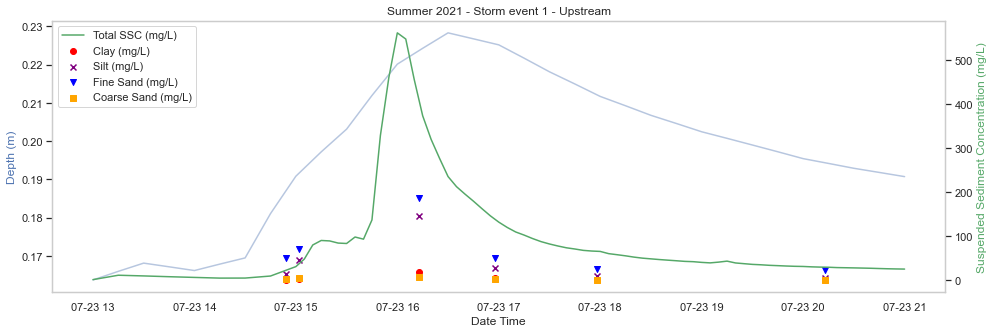

In [19]:
storm_start_date = "2021-07-23 13:00:00"  # start date
storm_end_date = "2021-07-23 21:00:00"    # end date

filtered_SSC = SSC_SM21[(SSC_SM21['Date_Time'] >= storm_start_date) & (SSC_SM21['Date_Time'] <= storm_end_date)]
# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(GSD_SM21_ST1_up['datetime'], GSD_SM21_ST1_up['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(GSD_SM21_ST1_up['datetime'], GSD_SM21_ST1_up['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(GSD_SM21_ST1_up['datetime'], GSD_SM21_ST1_up['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(GSD_SM21_ST1_up['datetime'], GSD_SM21_ST1_up['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Summer 2021 - Storm event 1 - Upstream')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

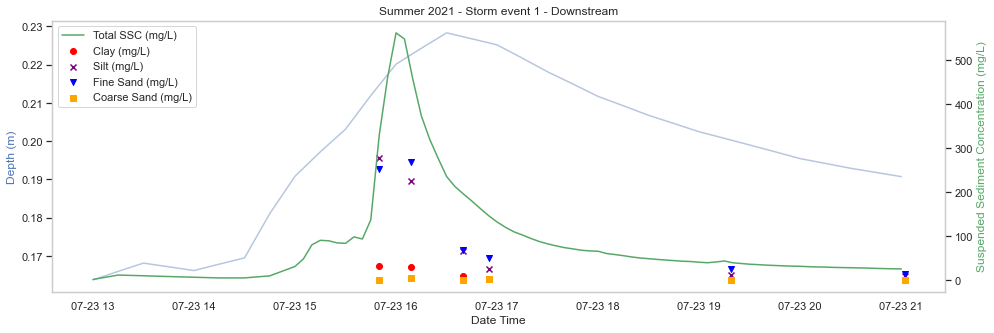

In [55]:
storm_start_date = "2021-07-23 13:00:00"  # start date
storm_end_date = "2021-07-23 21:00:00"    # end date

filtered_SSC = SSC_SM21[(SSC_SM21['Date_Time'] >= storm_start_date) & (SSC_SM21['Date_Time'] <= storm_end_date)]
# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(GSD_SM21_ST1_down['datetime'], GSD_SM21_ST1_down['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(GSD_SM21_ST1_down['datetime'], GSD_SM21_ST1_down['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(GSD_SM21_ST1_down['datetime'], GSD_SM21_ST1_down['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(GSD_SM21_ST1_down['datetime'], GSD_SM21_ST1_down['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Summer 2021 - Storm event 1 - Downstream')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

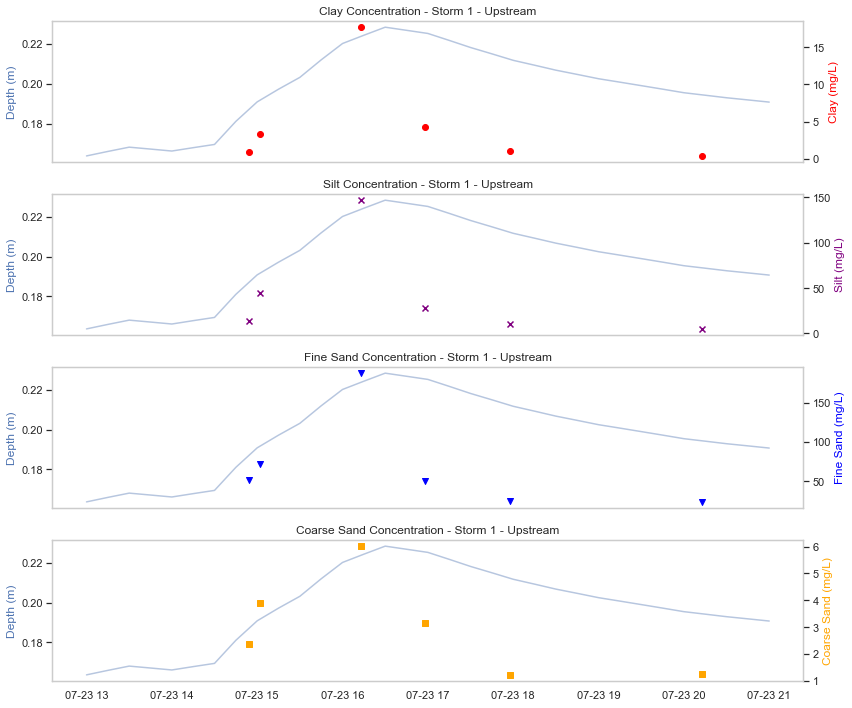

In [56]:
sns.set(style='whitegrid')
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# plot for clay
axs[0].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_clay = axs[0].twinx()
axs_clay.scatter(GSD_SM21_ST1_up['datetime'], GSD_SM21_ST1_up['Clay'], c='red', marker='o', label='Clay (mg/L)', zorder=3)
axs_clay.set_ylabel('Clay (mg/L)', color='red')
axs[0].set_title('Clay Concentration - Storm 1 - Upstream')
# plot for silt
axs[1].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_silt = axs[1].twinx()
axs_silt.scatter(GSD_SM21_ST1_up['datetime'], GSD_SM21_ST1_up['Silt'], c='purple', marker='x', label='Silt (mg/L)', zorder=4)
axs_silt.set_ylabel('Silt (mg/L)', color='purple')
axs[1].set_title('Silt Concentration - Storm 1 - Upstream')
# plot for fine sand
axs[2].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_fine_sand = axs[2].twinx()
axs_fine_sand.scatter(GSD_SM21_ST1_up['datetime'], GSD_SM21_ST1_up['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)', zorder=5)
axs_fine_sand.set_ylabel('Fine Sand (mg/L)', color='blue')
axs[2].set_title('Fine Sand Concentration - Storm 1 - Upstream')
# plot for coarse sand
axs[3].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_coarse_sand = axs[3].twinx()
axs_coarse_sand.scatter(GSD_SM21_ST1_up['datetime'], GSD_SM21_ST1_up['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)', zorder=6)
axs_coarse_sand.set_ylabel('Coarse Sand (mg/L)', color='orange')
axs[3].set_title('Coarse Sand Concentration - Storm 1 - Upstream')
# set labels
plt.xlabel('Date Time')
axs[0].set_ylabel('Depth (m)', color='b')
axs[1].set_ylabel('Depth (m)', color='b')
axs[2].set_ylabel('Depth (m)', color='b')
axs[3].set_ylabel('Depth (m)', color='b')
# no grid
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
axs_clay.grid(False)
axs_silt.grid(False)
axs_fine_sand.grid(False)
axs_coarse_sand.grid(False)

plt.tight_layout()
plt.show()

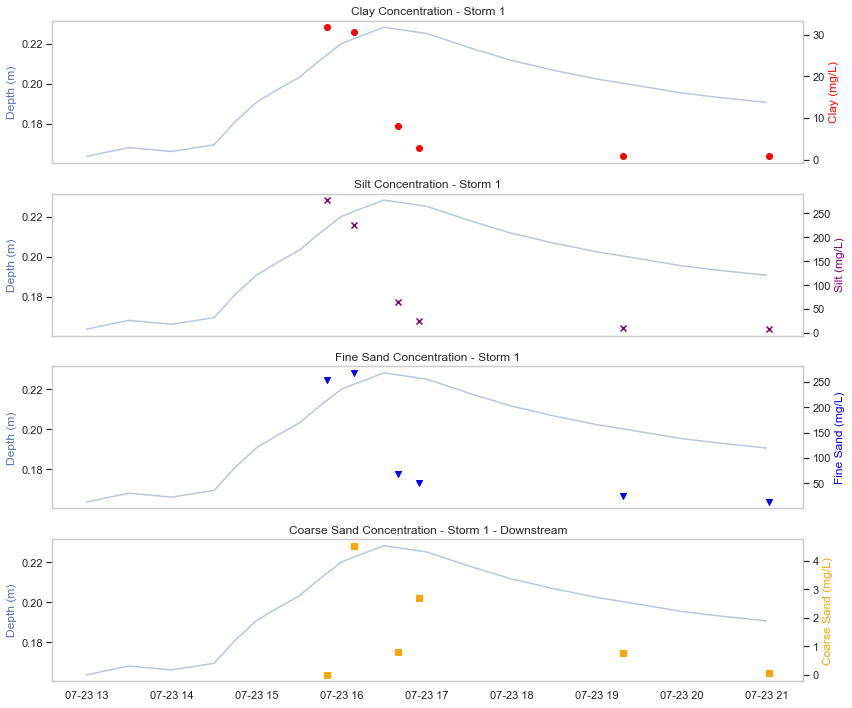

In [57]:
sns.set(style='whitegrid')
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# plot for clay
axs[0].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_clay = axs[0].twinx()
axs_clay.scatter(GSD_SM21_ST1_down['datetime'], GSD_SM21_ST1_down['Clay'], c='red', marker='o', label='Clay (mg/L)', zorder=3)
axs_clay.set_ylabel('Clay (mg/L)', color='red')
axs[0].set_title('Clay Concentration - Storm 1')
# plot for silt
axs[1].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_silt = axs[1].twinx()
axs_silt.scatter(GSD_SM21_ST1_down['datetime'], GSD_SM21_ST1_down['Silt'], c='purple', marker='x', label='Silt (mg/L)', zorder=4)
axs_silt.set_ylabel('Silt (mg/L)', color='purple')
axs[1].set_title('Silt Concentration - Storm 1')
# plot for fine sand
axs[2].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_fine_sand = axs[2].twinx()
axs_fine_sand.scatter(GSD_SM21_ST1_down['datetime'], GSD_SM21_ST1_down['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)', zorder=5)
axs_fine_sand.set_ylabel('Fine Sand (mg/L)', color='blue')
axs[2].set_title('Fine Sand Concentration - Storm 1')
# plot for coarse sand
axs[3].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_coarse_sand = axs[3].twinx()
axs_coarse_sand.scatter(GSD_SM21_ST1_down['datetime'], GSD_SM21_ST1_down['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)', zorder=6)
axs_coarse_sand.set_ylabel('Coarse Sand (mg/L)', color='orange')
axs[3].set_title('Coarse Sand Concentration - Storm 1 - Downstream')
# set labels
plt.xlabel('Date Time')
axs[0].set_ylabel('Depth (m)', color='b')
axs[1].set_ylabel('Depth (m)', color='b')
axs[2].set_ylabel('Depth (m)', color='b')
axs[3].set_ylabel('Depth (m)', color='b')
# no grid
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
axs_clay.grid(False)
axs_silt.grid(False)
axs_fine_sand.grid(False)
axs_coarse_sand.grid(False)

plt.savefig('plots/storm1_samples_down.png', dpi=300)
plt.tight_layout()
plt.show()

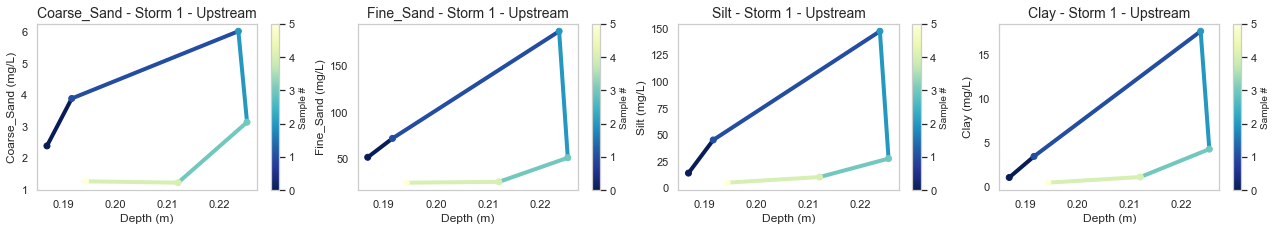

In [58]:
# All grain sizes - storm 4
sizes = ['Coarse_Sand', 'Fine_Sand', 'Silt', 'Clay']
fig, axs = plt.subplots(1, len(sizes), figsize=(4.5*len(sizes), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, size in zip(axs, sizes):
    if size not in GSD_SM21_ST1_up.columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(GSD_SM21_ST1_up['depth']))
    num_points = len(GSD_SM21_ST1_up['depth'])
    colorline(GSD_SM21_ST1_up['depth'], GSD_SM21_ST1_up[size], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(GSD_SM21_ST1_up['depth'], GSD_SM21_ST1_up[size], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{size} - Storm 1 - Upstream', fontsize=14)
    ax.set_ylabel(f"{size} (mg/L)", fontsize=12)
    ax.set_xlabel("Depth (m)", fontsize=12)

plt.show()

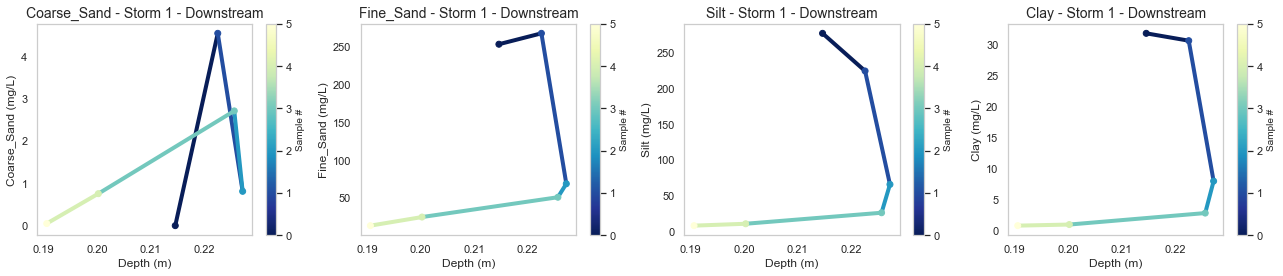

In [59]:
# All grain sizes - storm 1
sizes = ['Coarse_Sand', 'Fine_Sand', 'Silt', 'Clay']
fig, axs = plt.subplots(1, len(sizes), figsize=(4.5*len(sizes), 4))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, size in zip(axs, sizes):
    if size not in GSD_SM21_ST1_down.columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(GSD_SM21_ST1_down['depth']))
    num_points = len(GSD_SM21_ST1_down['depth'])
    colorline(GSD_SM21_ST1_down['depth'], GSD_SM21_ST1_down[size], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(GSD_SM21_ST1_down['depth'], GSD_SM21_ST1_down[size], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{size} - Storm 1 - Downstream', fontsize=14)
    ax.set_ylabel(f"{size} (mg/L)", fontsize=12)
    ax.set_xlabel("Depth (m)", fontsize=12)

plt.tight_layout()
plt.savefig('plots/storm1_hysteresis - Downstream.png', dpi=300)
plt.show()

##### Storm 2

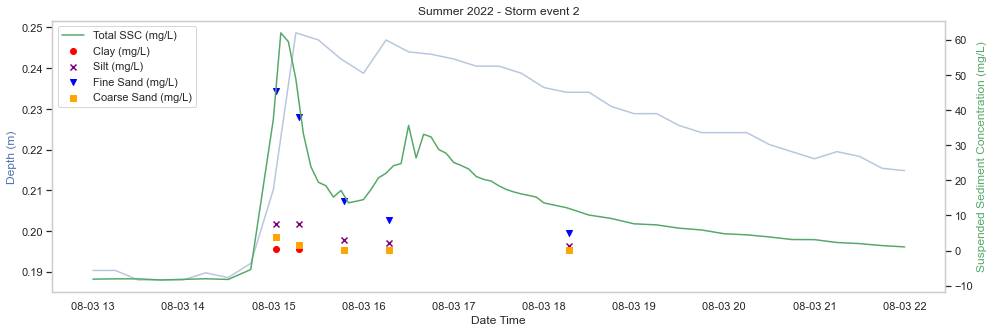

In [60]:
storm_start_date = "2022-08-03 12:00:00"  # start date
storm_end_date = "2022-08-03 22:00:00"    # end date

filtered_SSC = SSC_SM22[(SSC_SM22['Date_Time'] >= storm_start_date) & (SSC_SM22['Date_Time'] <= storm_end_date)]
# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(GSD_SM22_ST2_down['datetime'], GSD_SM22_ST2_down['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(GSD_SM22_ST2_down['datetime'], GSD_SM22_ST2_down['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(GSD_SM22_ST2_down['datetime'], GSD_SM22_ST2_down['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(GSD_SM22_ST2_down['datetime'], GSD_SM22_ST2_down['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Summer 2022 - Storm event 2')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

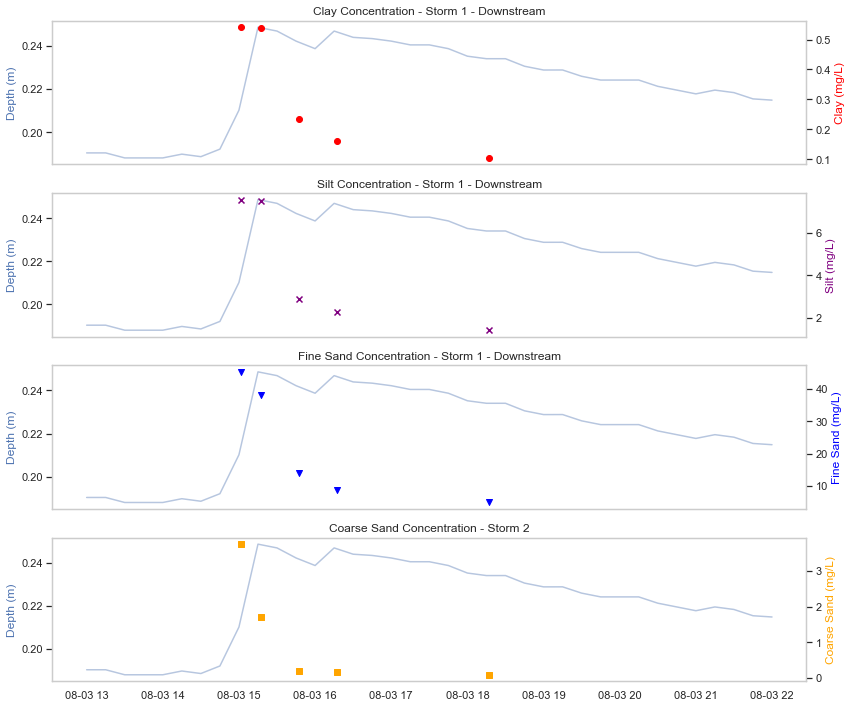

In [61]:
sns.set(style='whitegrid')
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# plot for clay
axs[0].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_clay = axs[0].twinx()
axs_clay.scatter(GSD_SM22_ST2_down['datetime'], GSD_SM22_ST2_down['Clay'], c='red', marker='o', label='Clay (mg/L)', zorder=3)
axs_clay.set_ylabel('Clay (mg/L)', color='red')
axs[0].set_title('Clay Concentration - Storm 1 - Downstream')
# plot for silt
axs[1].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_silt = axs[1].twinx()
axs_silt.scatter(GSD_SM22_ST2_down['datetime'], GSD_SM22_ST2_down['Silt'], c='purple', marker='x', label='Silt (mg/L)', zorder=4)
axs_silt.set_ylabel('Silt (mg/L)', color='purple')
axs[1].set_title('Silt Concentration - Storm 1 - Downstream')
# plot for fine sand
axs[2].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_fine_sand = axs[2].twinx()
axs_fine_sand.scatter(GSD_SM22_ST2_down['datetime'], GSD_SM22_ST2_down['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)', zorder=5)
axs_fine_sand.set_ylabel('Fine Sand (mg/L)', color='blue')
axs[2].set_title('Fine Sand Concentration - Storm 1 - Downstream')
# plot for coarse sand
axs[3].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_coarse_sand = axs[3].twinx()
axs_coarse_sand.scatter(GSD_SM22_ST2_down['datetime'], GSD_SM22_ST2_down['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)', zorder=6)
axs_coarse_sand.set_ylabel('Coarse Sand (mg/L)', color='orange')
axs[3].set_title('Coarse Sand Concentration - Storm 2')
# set labels
plt.xlabel('Date Time')
axs[0].set_ylabel('Depth (m)', color='b')
axs[1].set_ylabel('Depth (m)', color='b')
axs[2].set_ylabel('Depth (m)', color='b')
axs[3].set_ylabel('Depth (m)', color='b')
# no grid
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
axs_clay.grid(False)
axs_silt.grid(False)
axs_fine_sand.grid(False)
axs_coarse_sand.grid(False)

plt.tight_layout()
plt.savefig('plots/storm2_samples.png', dpi=300)
plt.show()

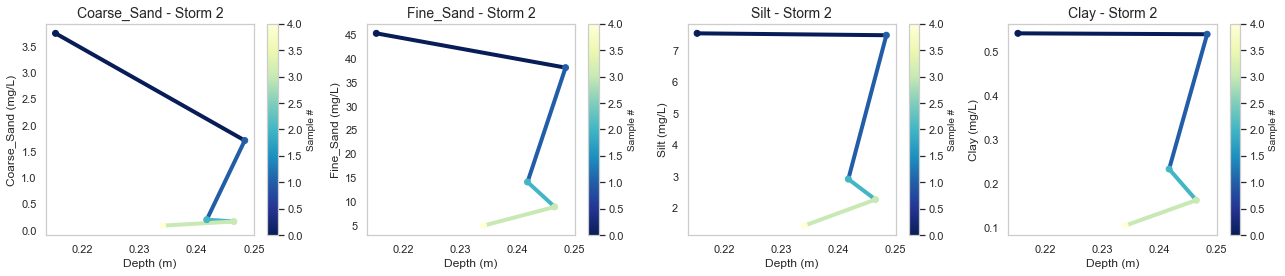

In [63]:
# All grain sizes - storm 4
sizes = ['Coarse_Sand', 'Fine_Sand', 'Silt', 'Clay']
fig, axs = plt.subplots(1, len(sizes), figsize=(4.5*len(sizes), 4))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, size in zip(axs, sizes):
    if size not in GSD_SM22_ST2_down.columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(GSD_SM22_ST2_down['depth']))
    num_points = len(GSD_SM22_ST2_down['depth'])
    colorline(GSD_SM22_ST2_down['depth'], GSD_SM22_ST2_down[size], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(GSD_SM22_ST2_down['depth'], GSD_SM22_ST2_down[size], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{size} - Storm 2', fontsize=14)
    ax.set_ylabel(f"{size} (mg/L)", fontsize=12)
    ax.set_xlabel("Depth (m)", fontsize=12)

plt.tight_layout()
plt.savefig('plots/storm2_hysteresis.png', dpi=300)
plt.show()

##### Storm 3

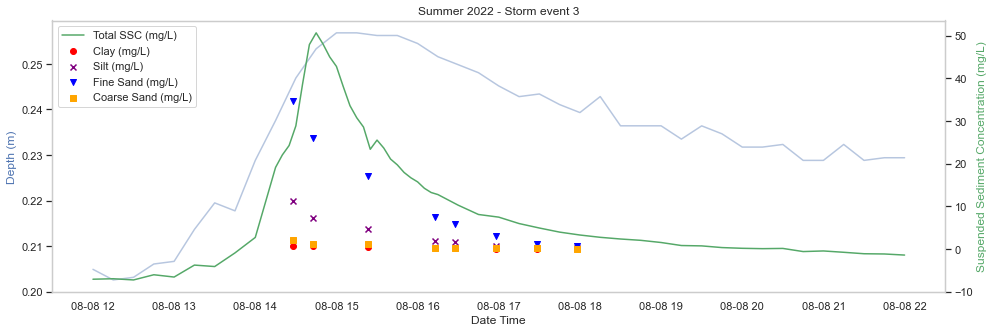

In [64]:
storm_start_date = "2022-08-08 12:00:00"  # start date
storm_end_date = "2022-08-08 22:00:00"    # end date

filtered_SSC = SSC_SM22[(SSC_SM22['Date_Time'] >= storm_start_date) & (SSC_SM22['Date_Time'] <= storm_end_date)]
# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(GSD_SM22_ST3_down['datetime'], GSD_SM22_ST3_down['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(GSD_SM22_ST3_down['datetime'], GSD_SM22_ST3_down['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(GSD_SM22_ST3_down['datetime'], GSD_SM22_ST3_down['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(GSD_SM22_ST3_down['datetime'], GSD_SM22_ST3_down['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Summer 2022 - Storm event 3')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

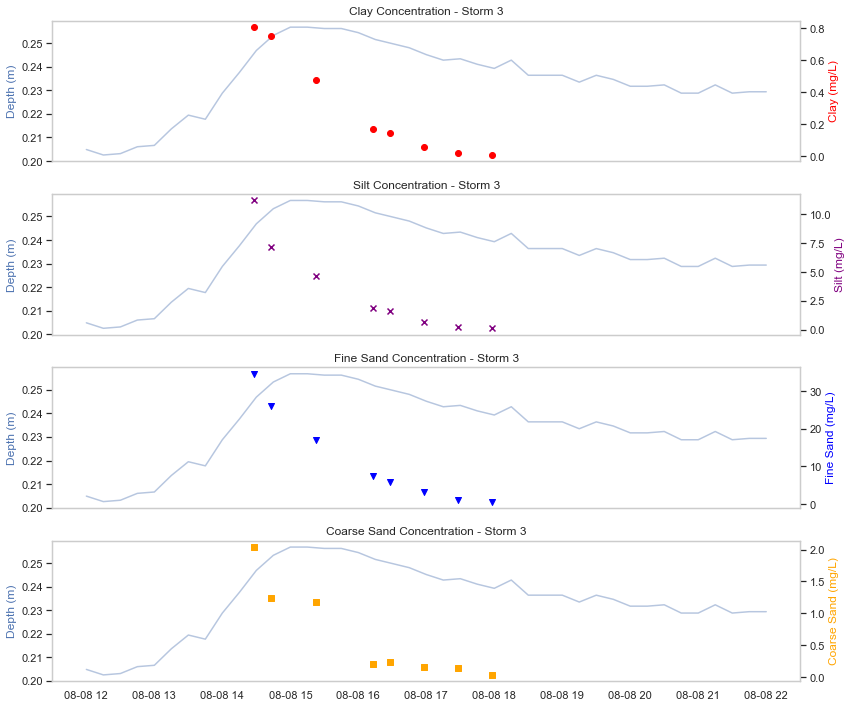

In [65]:
sns.set(style='whitegrid')
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# plot for clay
axs[0].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_clay = axs[0].twinx()
axs_clay.scatter(GSD_SM22_ST3_down['datetime'], GSD_SM22_ST3_down['Clay'], c='red', marker='o', label='Clay (mg/L)', zorder=3)
axs_clay.set_ylabel('Clay (mg/L)', color='red')
axs[0].set_title('Clay Concentration - Storm 3')
# plot for silt
axs[1].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_silt = axs[1].twinx()
axs_silt.scatter(GSD_SM22_ST3_down['datetime'], GSD_SM22_ST3_down['Silt'], c='purple', marker='x', label='Silt (mg/L)', zorder=4)
axs_silt.set_ylabel('Silt (mg/L)', color='purple')
axs[1].set_title('Silt Concentration - Storm 3')
# plot for fine sand
axs[2].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_fine_sand = axs[2].twinx()
axs_fine_sand.scatter(GSD_SM22_ST3_down['datetime'], GSD_SM22_ST3_down['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)', zorder=5)
axs_fine_sand.set_ylabel('Fine Sand (mg/L)', color='blue')
axs[2].set_title('Fine Sand Concentration - Storm 3')
# plot for coarse sand
axs[3].plot(filtered_SSC['Date_Time'], filtered_SSC['depth'], 'b-', alpha=0.4, zorder=1)
axs_coarse_sand = axs[3].twinx()
axs_coarse_sand.scatter(GSD_SM22_ST3_down['datetime'], GSD_SM22_ST3_down['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)', zorder=6)
axs_coarse_sand.set_ylabel('Coarse Sand (mg/L)', color='orange')
axs[3].set_title('Coarse Sand Concentration - Storm 3')
# set labels
plt.xlabel('Date Time')
axs[0].set_ylabel('Depth (m)', color='b')
axs[1].set_ylabel('Depth (m)', color='b')
axs[2].set_ylabel('Depth (m)', color='b')
axs[3].set_ylabel('Depth (m)', color='b')
# no grid
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
axs_clay.grid(False)
axs_silt.grid(False)
axs_fine_sand.grid(False)
axs_coarse_sand.grid(False)

plt.tight_layout()
plt.savefig('plots/storm3_samples.png', dpi=300)
plt.show()

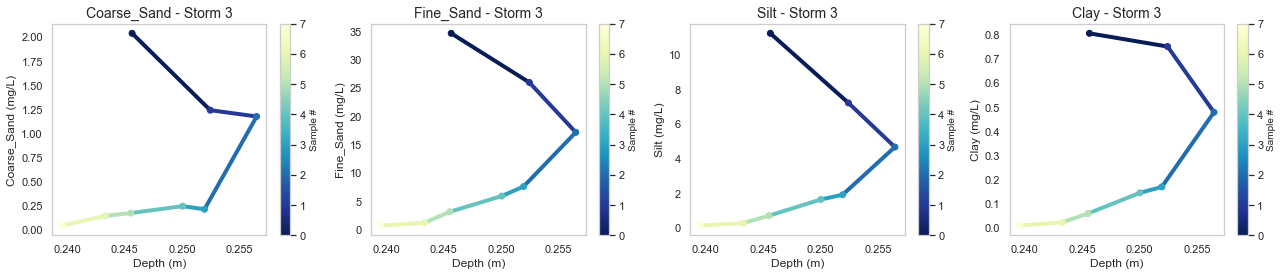

In [66]:
# All grain sizes - storm 4
sizes = ['Coarse_Sand', 'Fine_Sand', 'Silt', 'Clay']
fig, axs = plt.subplots(1, len(sizes), figsize=(4.5*len(sizes), 4))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, size in zip(axs, sizes):
    if size not in GSD_SM22_ST3_down.columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(GSD_SM22_ST3_down['depth']))
    num_points = len(GSD_SM22_ST3_down['depth'])
    colorline(GSD_SM22_ST3_down['depth'], GSD_SM22_ST3_down[size], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(GSD_SM22_ST3_down['depth'], GSD_SM22_ST3_down[size], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{size} - Storm 3', fontsize=14)
    ax.set_ylabel(f"{size} (mg/L)", fontsize=12)
    ax.set_xlabel("Depth (m)", fontsize=12)

plt.tight_layout()
plt.savefig('plots/storm3_hysteresis.png', dpi=300)
plt.show()

##### Storm 4

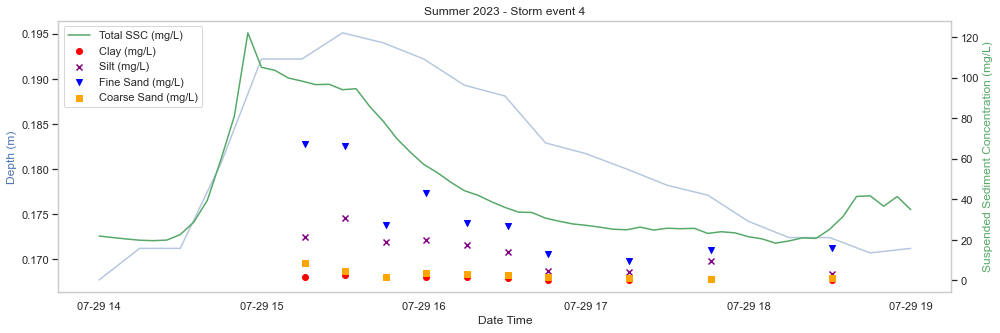

In [67]:
storm_start_date = "2023-07-29 14:00:00"  # start date
storm_end_date = "2023-07-29 19:00:00"    # end date

filtered_SSC = SSC_SM23[(SSC_SM23['Date_Time'] >= storm_start_date) & (SSC_SM23['Date_Time'] <= storm_end_date)]
# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(GSD_SM23_ST4['datetime'], GSD_SM23_ST4['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(GSD_SM23_ST4['datetime'], GSD_SM23_ST4['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(GSD_SM23_ST4['datetime'], GSD_SM23_ST4['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(GSD_SM23_ST4['datetime'], GSD_SM23_ST4['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Summer 2023 - Storm event 4')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

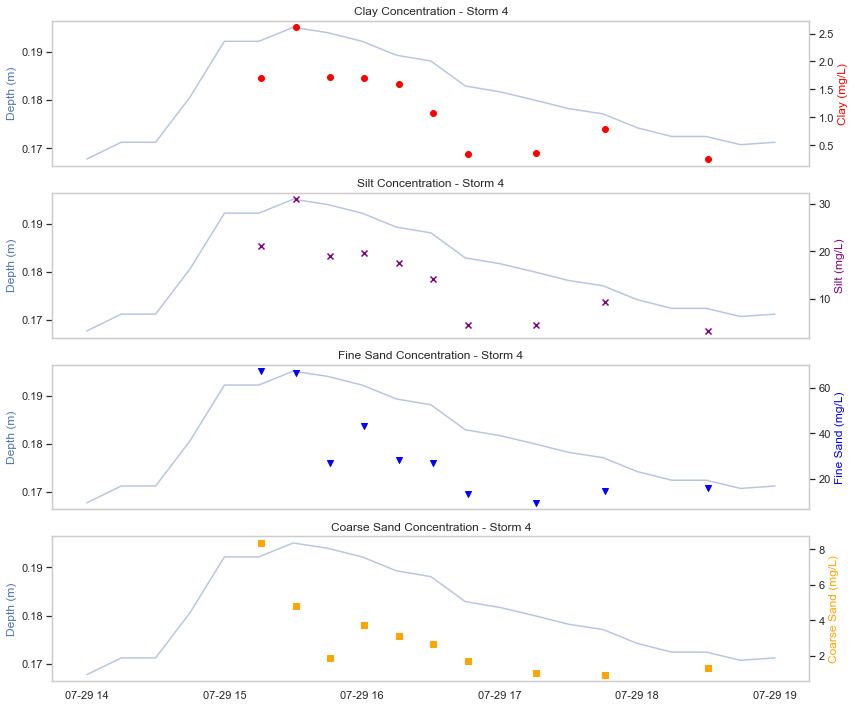

In [68]:
sns.set(style='whitegrid')
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# plot for clay
axs[0].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_clay = axs[0].twinx()
axs_clay.scatter(GSD_SM23_ST4['datetime'], GSD_SM23_ST4['Clay'], c='red', marker='o', label='Clay (mg/L)', zorder=3)
axs_clay.set_ylabel('Clay (mg/L)', color='red')
axs[0].set_title('Clay Concentration - Storm 4')
# plot for silt
axs[1].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_silt = axs[1].twinx()
axs_silt.scatter(GSD_SM23_ST4['datetime'], GSD_SM23_ST4['Silt'], c='purple', marker='x', label='Silt (mg/L)', zorder=4)
axs_silt.set_ylabel('Silt (mg/L)', color='purple')
axs[1].set_title('Silt Concentration - Storm 4')
# plot for fine sand
axs[2].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_fine_sand = axs[2].twinx()
axs_fine_sand.scatter(GSD_SM23_ST4['datetime'], GSD_SM23_ST4['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)', zorder=5)
axs_fine_sand.set_ylabel('Fine Sand (mg/L)', color='blue')
axs[2].set_title('Fine Sand Concentration - Storm 4')
# plot for coarse sand
axs[3].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_coarse_sand = axs[3].twinx()
axs_coarse_sand.scatter(GSD_SM23_ST4['datetime'], GSD_SM23_ST4['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)', zorder=6)
axs_coarse_sand.set_ylabel('Coarse Sand (mg/L)', color='orange')
axs[3].set_title('Coarse Sand Concentration - Storm 4')
# set labels
plt.xlabel('Date Time')
axs[0].set_ylabel('Depth (m)', color='b')
axs[1].set_ylabel('Depth (m)', color='b')
axs[2].set_ylabel('Depth (m)', color='b')
axs[3].set_ylabel('Depth (m)', color='b')
# no grid
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
axs_clay.grid(False)
axs_silt.grid(False)
axs_fine_sand.grid(False)
axs_coarse_sand.grid(False)


plt.tight_layout()
plt.savefig('plots/storm4_samples.png', dpi=300)
plt.show()

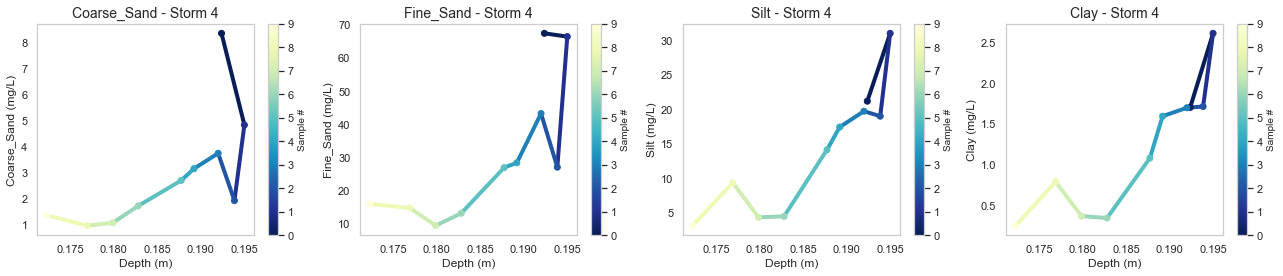

In [69]:
# All grain sizes - storm 4
sizes = ['Coarse_Sand', 'Fine_Sand', 'Silt', 'Clay']
fig, axs = plt.subplots(1, len(sizes), figsize=(4.5*len(sizes), 4))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, size in zip(axs, sizes):
    if size not in GSD_SM23_ST4.columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(GSD_SM23_ST4['P3']))
    num_points = len(GSD_SM23_ST4['P3'])
    colorline(GSD_SM23_ST4['P3'], GSD_SM23_ST4[size], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(GSD_SM23_ST4['P3'], GSD_SM23_ST4[size], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{size} - Storm 4', fontsize=14)
    ax.set_ylabel(f"{size} (mg/L)", fontsize=12)
    ax.set_xlabel("Depth (m)", fontsize=12)

plt.tight_layout()
plt.savefig('plots/storm4_hysteresis.png', dpi=300)
plt.show()

##### Storm 5

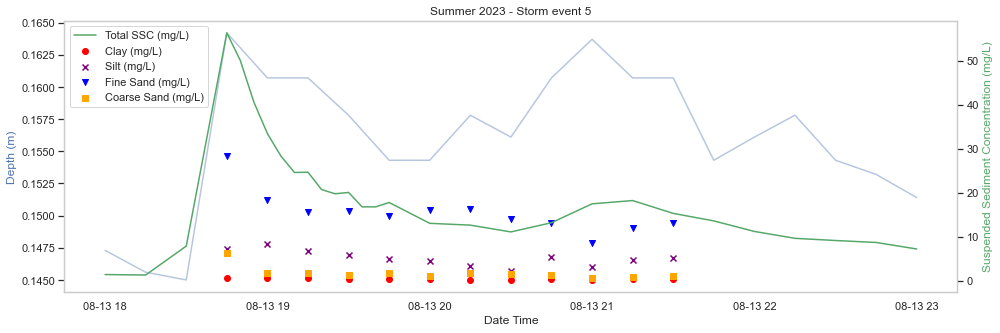

In [70]:
storm_start_date = "2023-08-13 18:00:00"  
storm_end_date = "2023-08-13 23:00:00"    

filtered_SSC = SSC_SM23[(SSC_SM23['Date_Time'] >= storm_start_date) & (SSC_SM23['Date_Time'] <= storm_end_date)]
# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(GSD_SM23_ST5['datetime'], GSD_SM23_ST5['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(GSD_SM23_ST5['datetime'], GSD_SM23_ST5['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(GSD_SM23_ST5['datetime'], GSD_SM23_ST5['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(GSD_SM23_ST5['datetime'], GSD_SM23_ST5['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Summer 2023 - Storm event 5')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

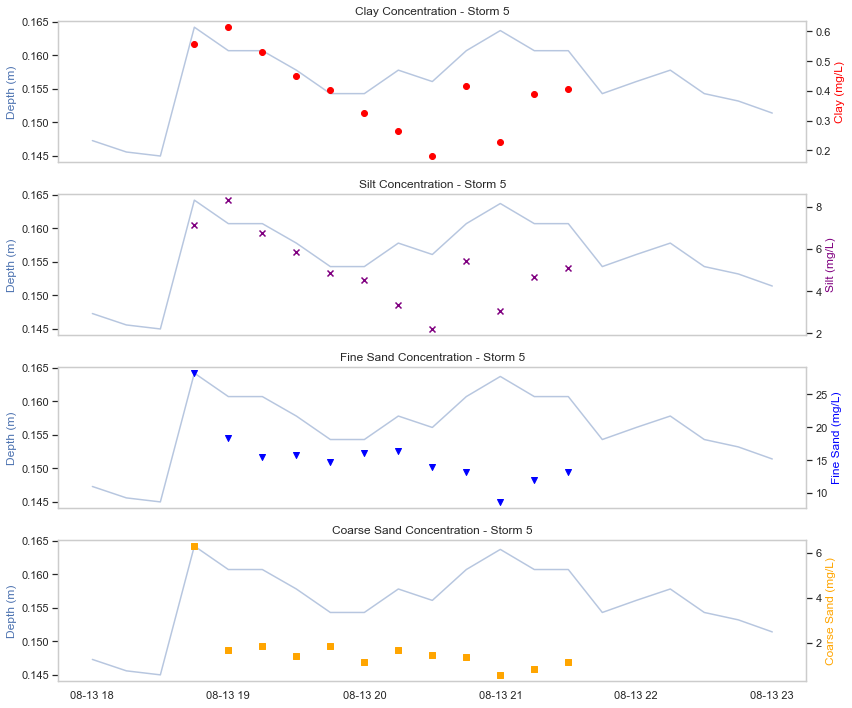

In [71]:
sns.set(style='whitegrid')
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# plot for clay
axs[0].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_clay = axs[0].twinx()
axs_clay.scatter(GSD_SM23_ST5['datetime'], GSD_SM23_ST5['Clay'], c='red', marker='o', label='Clay (mg/L)', zorder=3)
axs_clay.set_ylabel('Clay (mg/L)', color='red')
axs[0].set_title('Clay Concentration - Storm 5')
# plot for silt
axs[1].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_silt = axs[1].twinx()
axs_silt.scatter(GSD_SM23_ST5['datetime'], GSD_SM23_ST5['Silt'], c='purple', marker='x', label='Silt (mg/L)', zorder=4)
axs_silt.set_ylabel('Silt (mg/L)', color='purple')
axs[1].set_title('Silt Concentration - Storm 5')
# plot for fine sand
axs[2].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_fine_sand = axs[2].twinx()
axs_fine_sand.scatter(GSD_SM23_ST5['datetime'], GSD_SM23_ST5['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)', zorder=5)
axs_fine_sand.set_ylabel('Fine Sand (mg/L)', color='blue')
axs[2].set_title('Fine Sand Concentration - Storm 5')
# plot for coarse sand
axs[3].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_coarse_sand = axs[3].twinx()
axs_coarse_sand.scatter(GSD_SM23_ST5['datetime'], GSD_SM23_ST5['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)', zorder=6)
axs_coarse_sand.set_ylabel('Coarse Sand (mg/L)', color='orange')
axs[3].set_title('Coarse Sand Concentration - Storm 5')
# set labels
plt.xlabel('Date Time')
axs[0].set_ylabel('Depth (m)', color='b')
axs[1].set_ylabel('Depth (m)', color='b')
axs[2].set_ylabel('Depth (m)', color='b')
axs[3].set_ylabel('Depth (m)', color='b')
# no grid
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
axs_clay.grid(False)
axs_silt.grid(False)
axs_fine_sand.grid(False)
axs_coarse_sand.grid(False)

plt.tight_layout()
plt.savefig('plots/storm5_samples.png', dpi=300)
plt.show()

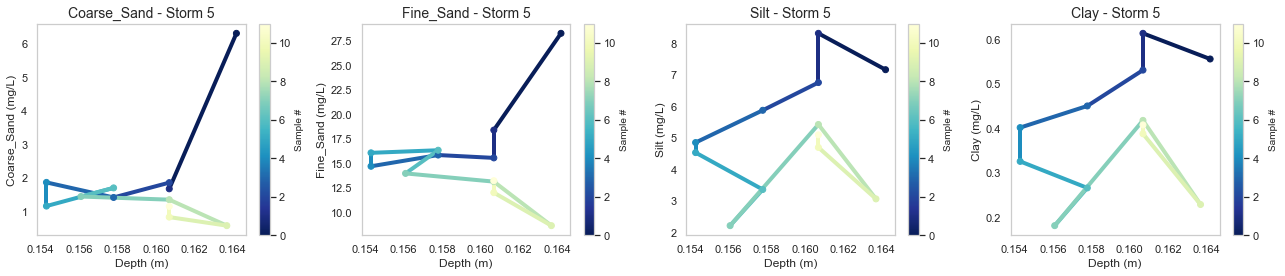

In [72]:
# All grain sizes - storm 5
sizes = ['Coarse_Sand', 'Fine_Sand', 'Silt', 'Clay']
fig, axs = plt.subplots(1, len(sizes), figsize=(4.5*len(sizes), 4))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, size in zip(axs, sizes):
    if size not in GSD_SM23_ST5.columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(GSD_SM23_ST5['P3']))
    num_points = len(GSD_SM23_ST5['P3'])
    colorline(GSD_SM23_ST5['P3'], GSD_SM23_ST5[size], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(GSD_SM23_ST5['P3'], GSD_SM23_ST5[size], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{size} - Storm 5', fontsize=14)
    ax.set_ylabel(f"{size} (mg/L)", fontsize=12)
    ax.set_xlabel("Depth (m)", fontsize=12)

plt.tight_layout()
plt.savefig('plots/storm5_hysteresis.png', dpi=300)
plt.show()

##### Storm 6

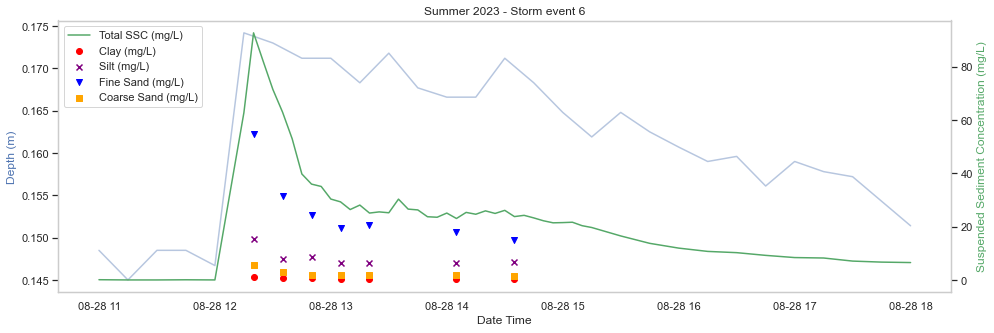

In [73]:
storm_start_date = "2023-08-28 11:00:00"  
storm_end_date = "2023-08-28 18:00:00"   

filtered_SSC = SSC_SM23[(SSC_SM23['Date_Time'] >= storm_start_date) & (SSC_SM23['Date_Time'] <= storm_end_date)]
# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(GSD_SM23_ST6['datetime'], GSD_SM23_ST6['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(GSD_SM23_ST6['datetime'], GSD_SM23_ST6['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(GSD_SM23_ST6['datetime'], GSD_SM23_ST6['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(GSD_SM23_ST6['datetime'], GSD_SM23_ST6['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Summer 2023 - Storm event 6')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

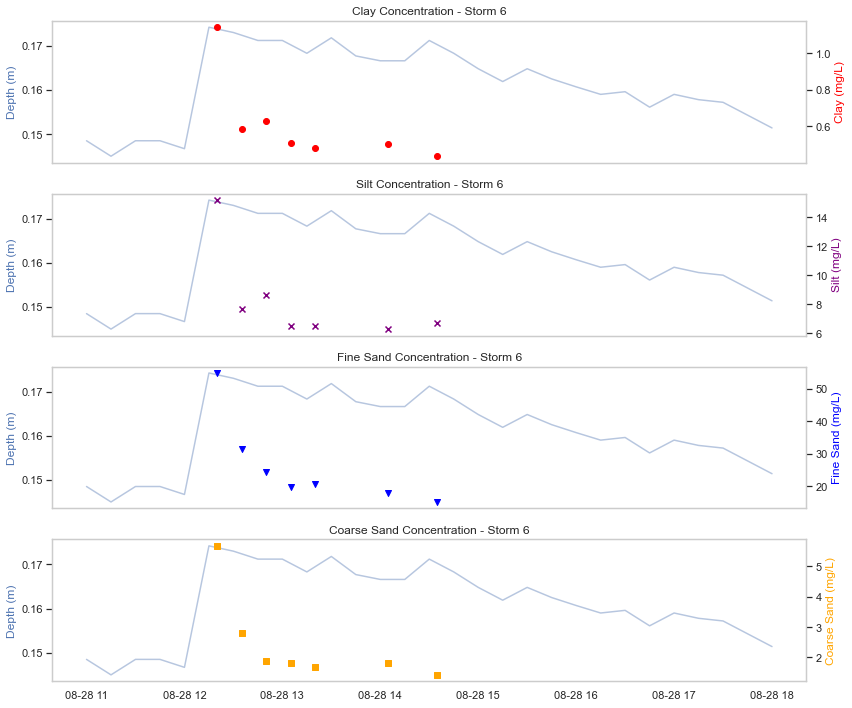

In [74]:
sns.set(style='whitegrid')
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# plot for clay
axs[0].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_clay = axs[0].twinx()
axs_clay.scatter(GSD_SM23_ST6['datetime'], GSD_SM23_ST6['Clay'], c='red', marker='o', label='Clay (mg/L)', zorder=3)
axs_clay.set_ylabel('Clay (mg/L)', color='red')
axs[0].set_title('Clay Concentration - Storm 6')
# plot for silt
axs[1].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_silt = axs[1].twinx()
axs_silt.scatter(GSD_SM23_ST6['datetime'], GSD_SM23_ST6['Silt'], c='purple', marker='x', label='Silt (mg/L)', zorder=4)
axs_silt.set_ylabel('Silt (mg/L)', color='purple')
axs[1].set_title('Silt Concentration - Storm 6')
# plot for fine sand
axs[2].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_fine_sand = axs[2].twinx()
axs_fine_sand.scatter(GSD_SM23_ST6['datetime'], GSD_SM23_ST6['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)', zorder=5)
axs_fine_sand.set_ylabel('Fine Sand (mg/L)', color='blue')
axs[2].set_title('Fine Sand Concentration - Storm 6')
# plot for coarse sand
axs[3].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_coarse_sand = axs[3].twinx()
axs_coarse_sand.scatter(GSD_SM23_ST6['datetime'], GSD_SM23_ST6['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)', zorder=6)
axs_coarse_sand.set_ylabel('Coarse Sand (mg/L)', color='orange')
axs[3].set_title('Coarse Sand Concentration - Storm 6')
# set labels
plt.xlabel('Date Time')
axs[0].set_ylabel('Depth (m)', color='b')
axs[1].set_ylabel('Depth (m)', color='b')
axs[2].set_ylabel('Depth (m)', color='b')
axs[3].set_ylabel('Depth (m)', color='b')
# no grid
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
axs_clay.grid(False)
axs_silt.grid(False)
axs_fine_sand.grid(False)
axs_coarse_sand.grid(False)

plt.tight_layout()
plt.savefig('plots/storm6_samples.png', dpi=300)
plt.show()

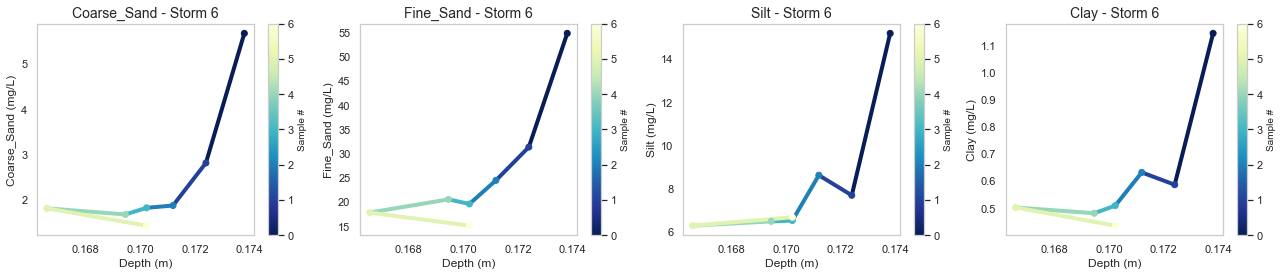

In [112]:
# All grain sizes - storm 6
sizes = ['Coarse_Sand', 'Fine_Sand', 'Silt', 'Clay']
fig, axs = plt.subplots(1, len(sizes), figsize=(4.5*len(sizes), 4))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, size in zip(axs, sizes):
    if size not in GSD_SM23_ST6.columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(GSD_SM23_ST6['P3']))
    num_points = len(GSD_SM23_ST6['P3'])
    colorline(GSD_SM23_ST6['P3'], GSD_SM23_ST6[size], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(GSD_SM23_ST6['P3'], GSD_SM23_ST6[size], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{size} - Storm 6', fontsize=14)
    ax.set_ylabel(f"{size} (mg/L)", fontsize=12)
    ax.set_xlabel("Depth (m)", fontsize=12)

plt.tight_layout()
plt.savefig('plots/storm6_hysteresis.png', dpi=300)
plt.show()

##### Storm 7

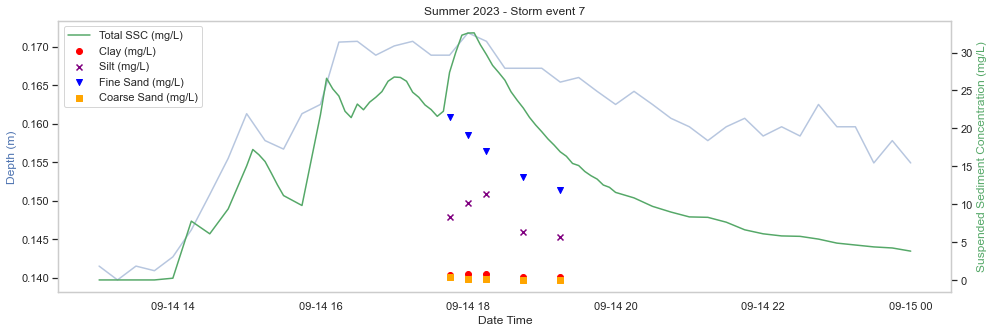

In [113]:
storm_start_date = "2023-09-14 13:00:00"
storm_end_date = "2023-09-15 00:00:00"   

filtered_SSC = SSC_SM23[(SSC_SM23['Date_Time'] >= storm_start_date) & (SSC_SM23['Date_Time'] <= storm_end_date)]
# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Summer 2023 - Storm event 7')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

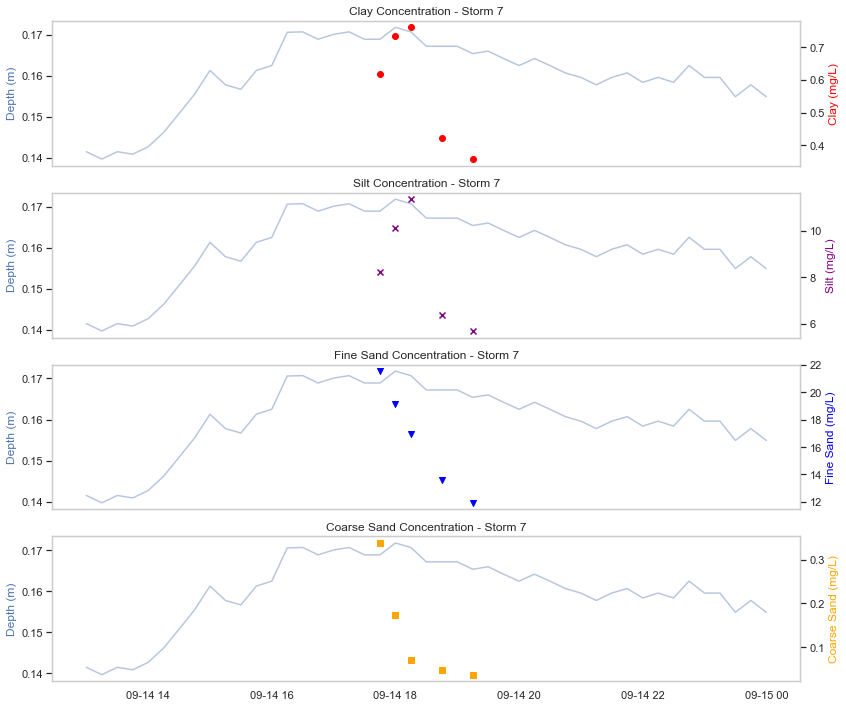

In [ ]:
sns.set(style='whitegrid')
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# plot for clay
axs[0].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_clay = axs[0].twinx()
axs_clay.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Clay'], c='red', marker='o', label='Clay (mg/L)', zorder=3)
axs_clay.set_ylabel('Clay (mg/L)', color='red')
axs[0].set_title('Clay Concentration - Storm 7')
# plot for silt
axs[1].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_silt = axs[1].twinx()
axs_silt.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Silt'], c='purple', marker='x', label='Silt (mg/L)', zorder=4)
axs_silt.set_ylabel('Silt (mg/L)', color='purple')
axs[1].set_title('Silt Concentration - Storm 7')
# plot for fine sand
axs[2].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_fine_sand = axs[2].twinx()
axs_fine_sand.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)', zorder=5)
axs_fine_sand.set_ylabel('Fine Sand (mg/L)', color='blue')
axs[2].set_title('Fine Sand Concentration - Storm 7')
# plot for coarse sand
axs[3].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_coarse_sand = axs[3].twinx()
axs_coarse_sand.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)', zorder=6)
axs_coarse_sand.set_ylabel('Coarse Sand (mg/L)', color='orange')
axs[3].set_title('Coarse Sand Concentration - Storm 7')
# set labels
plt.xlabel('Date Time')
axs[0].set_ylabel('Depth (m)', color='b')
axs[1].set_ylabel('Depth (m)', color='b')
axs[2].set_ylabel('Depth (m)', color='b')
axs[3].set_ylabel('Depth (m)', color='b')
# no grid
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
axs_clay.grid(False)
axs_silt.grid(False)
axs_fine_sand.grid(False)
axs_coarse_sand.grid(False)

plt.tight_layout()
plt.
plt.show()

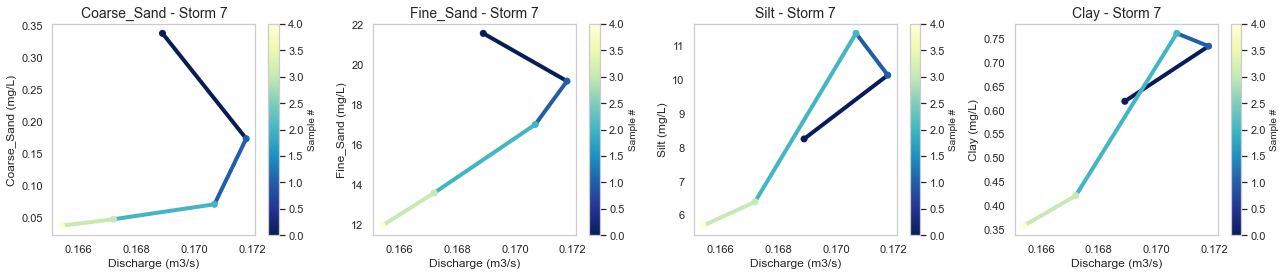

In [117]:
# All grain sizes - storm 7
sizes = ['Coarse_Sand', 'Fine_Sand', 'Silt', 'Clay']
fig, axs = plt.subplots(1, len(sizes), figsize=(4.5*len(sizes), 4))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, size in zip(axs, sizes):
    if size not in GSD_SM23_ST7.columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(GSD_SM23_ST7['P3']))
    num_points = len(GSD_SM23_ST7['P3'])
    colorline(GSD_SM23_ST7['P3'], GSD_SM23_ST7[size], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(GSD_SM23_ST7['P3'], GSD_SM23_ST7[size], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{size} - Storm 7', fontsize=14)
    ax.set_ylabel(f"{size} (mg/L)", fontsize=12)
    ax.set_xlabel("Discharge (m3/s)", fontsize=12)

plt.tight_layout()
plt.savefig('plots/storm7_hysteresis.png')
plt.show()

Storm 7 (shortened)

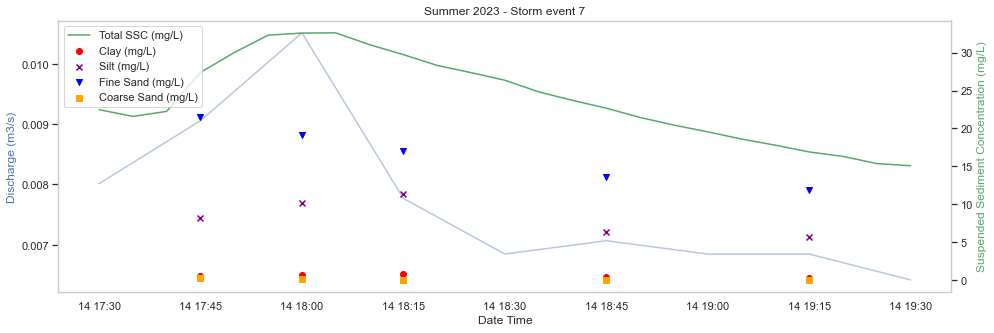

In [119]:
storm_start_date = "2023-09-14 17:30:00"
storm_end_date = "2023-09-14 19:30:00"   

filtered_SSC = SSC_SM23[(SSC_SM23['Date_Time'] >= storm_start_date) & (SSC_SM23['Date_Time'] <= storm_end_date)]
# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['Q'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Discharge (m3/s)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Summer 2023 - Storm event 7')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

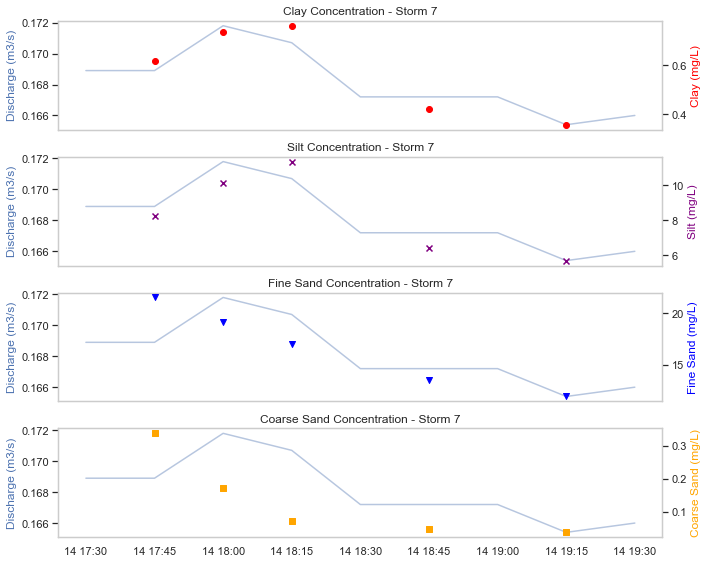

In [120]:
sns.set(style='whitegrid')
fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# plot for clay
axs[0].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_clay = axs[0].twinx()
axs_clay.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Clay'], c='red', marker='o', label='Clay (mg/L)', zorder=3)
axs_clay.set_ylabel('Clay (mg/L)', color='red')
axs[0].set_title('Clay Concentration - Storm 7')
# plot for silt
axs[1].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_silt = axs[1].twinx()
axs_silt.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Silt'], c='purple', marker='x', label='Silt (mg/L)', zorder=4)
axs_silt.set_ylabel('Silt (mg/L)', color='purple')
axs[1].set_title('Silt Concentration - Storm 7')
# plot for fine sand
axs[2].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_fine_sand = axs[2].twinx()
axs_fine_sand.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)', zorder=5)
axs_fine_sand.set_ylabel('Fine Sand (mg/L)', color='blue')
axs[2].set_title('Fine Sand Concentration - Storm 7')
# plot for coarse sand
axs[3].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_coarse_sand = axs[3].twinx()
axs_coarse_sand.scatter(GSD_SM23_ST7['datetime'], GSD_SM23_ST7['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)', zorder=6)
axs_coarse_sand.set_ylabel('Coarse Sand (mg/L)', color='orange')
axs[3].set_title('Coarse Sand Concentration - Storm 7')
# set labels
plt.xlabel('Date Time')
axs[0].set_ylabel('Discharge (m3/s)', color='b')
axs[1].set_ylabel('Discharge (m3/s)', color='b')
axs[2].set_ylabel('Discharge (m3/s)', color='b')
axs[3].set_ylabel('Discharge (m3/s)', color='b')
# no grid
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
axs_clay.grid(False)
axs_silt.grid(False)
axs_fine_sand.grid(False)
axs_coarse_sand.grid(False)

plt.savefig('plots/storm7_samples_short.png')
plt.tight_layout()
plt.show()

#### Spring Hysteresis

In [20]:
# convert columns to numeric, coercing errors to NaN, then filling NaN with 0
for col in range(6, 49):  # this is the range my GS data is in
    GSD_SP23_down.iloc[:, col] = pd.to_numeric(GSD_SP23_down.iloc[:, col], errors='coerce').fillna(0)
    GSD_SP23_up.iloc[:, col] = pd.to_numeric(GSD_SP23_up.iloc[:, col], errors='coerce').fillna(0)

# sum values for each sediment type based on the provided column ranges
GSD_SP23_up['Clay'] = GSD_SP23_up.iloc[:, 6:17].sum(axis=1)
GSD_SP23_up['Silt'] = GSD_SP23_up.iloc[:, 17:31].sum(axis=1)
GSD_SP23_up['Fine_Sand'] = GSD_SP23_up.iloc[:, 31:45].sum(axis=1)
GSD_SP23_up['Coarse_Sand'] = GSD_SP23_up.iloc[:, 45:49].sum(axis=1)
GSD_SP23_down['Clay'] = GSD_SP23_down.iloc[:, 6:17].sum(axis=1)
GSD_SP23_down['Silt'] = GSD_SP23_down.iloc[:, 17:31].sum(axis=1)
GSD_SP23_down['Fine_Sand'] = GSD_SP23_down.iloc[:, 31:45].sum(axis=1)
GSD_SP23_down['Coarse_Sand'] = GSD_SP23_down.iloc[:, 45:49].sum(axis=1)

# those are just percentages, so I need to multiply them by the SSC values 
GSD_SP23_up['Clay'] = GSD_SP23_up['Clay'] * GSD_SP23_up['SSC (mg/L)_x']
GSD_SP23_up['Silt'] = GSD_SP23_up['Silt'] * GSD_SP23_up['SSC (mg/L)_x']
GSD_SP23_up['Fine_Sand'] = GSD_SP23_up['Fine_Sand'] * GSD_SP23_up['SSC (mg/L)_x']
GSD_SP23_up['Coarse_Sand'] = GSD_SP23_up['Coarse_Sand'] * GSD_SP23_up['SSC (mg/L)_x']
GSD_SP23_down['Clay'] = GSD_SP23_down['Clay'] * GSD_SP23_down['SSC (mg/L)_x']
GSD_SP23_down['Silt'] = GSD_SP23_down['Silt'] * GSD_SP23_down['SSC (mg/L)_x']
GSD_SP23_down['Fine_Sand'] = GSD_SP23_down['Fine_Sand'] * GSD_SP23_down['SSC (mg/L)_x']
GSD_SP23_down['Coarse_Sand'] = GSD_SP23_down['Coarse_Sand'] * GSD_SP23_down['SSC (mg/L)_x']

# getting the fines to sand ratio
GSD_SP23_up['Fine/Sand'] = (GSD_SP23_up['Clay'] + GSD_SP23_up['Silt']) / (GSD_SP23_up['Fine_Sand'] + GSD_SP23_up['Coarse_Sand'])
GSD_SP23_down['Fine/Sand'] = (GSD_SP23_down['Clay'] + GSD_SP23_down['Silt']) / (GSD_SP23_down['Fine_Sand'] + GSD_SP23_down['Coarse_Sand'])

# separation between storm events
GSD_SP23_ST1_up = GSD_SP23_up[GSD_SP23_up['sample'].str.contains('ST1')].copy()
GSD_SP23_ST1_down = GSD_SP23_down[GSD_SP23_down['sample'].str.contains('ST1')].copy()

##### Event 1

Downstream

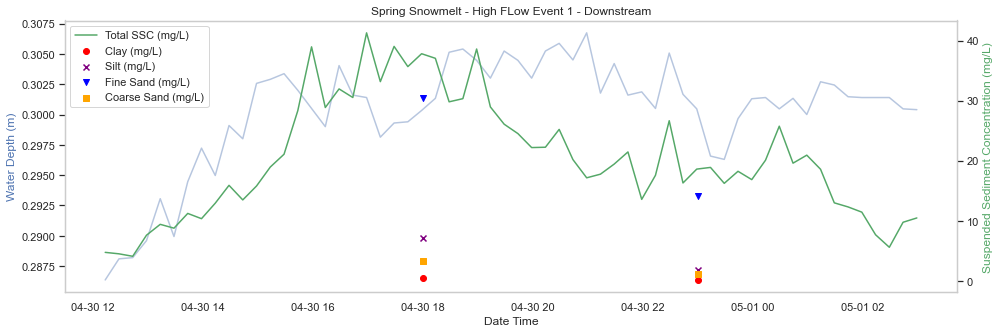

In [21]:
storm_start_date = "2023-04-30 12:00:00"
storm_end_date = "2023-05-01 03:00:00"   

filtered_SSC = SSC_SP23[(SSC_SP23['Date_Time'] >= storm_start_date) & (SSC_SP23['Date_Time'] <= storm_end_date)]
filtered_GSD = GSD_SP23_down[(GSD_SP23_down['datetime'] >= storm_start_date) & (GSD_SP23_down['datetime'] <= storm_end_date)]

# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Water Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Spring Snowmelt - High FLow Event 1 - Downstream')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

Upstream

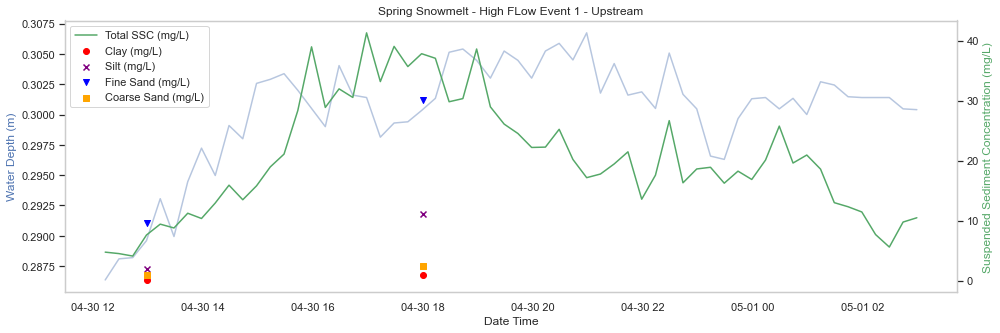

In [22]:
storm_start_date = "2023-04-30 12:00:00"
storm_end_date = "2023-05-01 03:00:00"   

filtered_SSC = SSC_SP23[(SSC_SP23['Date_Time'] >= storm_start_date) & (SSC_SP23['Date_Time'] <= storm_end_date)]
filtered_GSD = GSD_SP23_up[(GSD_SP23_up['datetime'] >= storm_start_date) & (GSD_SP23_up['datetime'] <= storm_end_date)]

# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Water Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Spring Snowmelt - High FLow Event 1 - Upstream')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

##### Event 2

Downstream

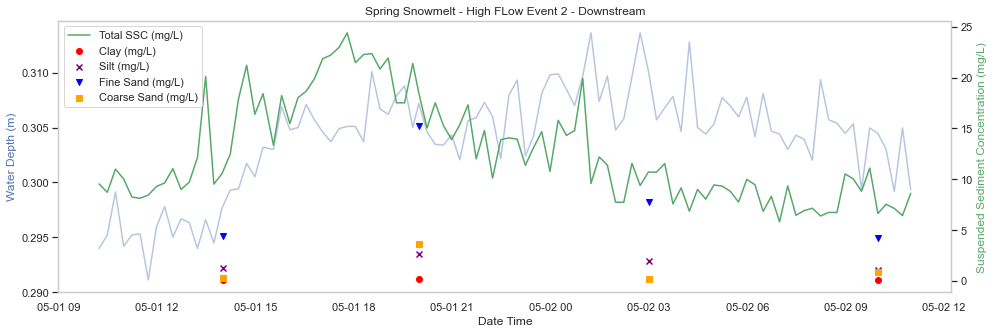

In [33]:
storm_start_date = "2023-05-01 10:00:00"
storm_end_date = "2023-05-02 11:00:00"   

filtered_SSC = SSC_SP23[(SSC_SP23['Date_Time'] >= storm_start_date) & (SSC_SP23['Date_Time'] <= storm_end_date)]
filtered_GSD = GSD_SP23_down[(GSD_SP23_down['datetime'] >= storm_start_date) & (GSD_SP23_down['datetime'] <= storm_end_date)]

# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Water Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Spring Snowmelt - High FLow Event 2 - Downstream')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

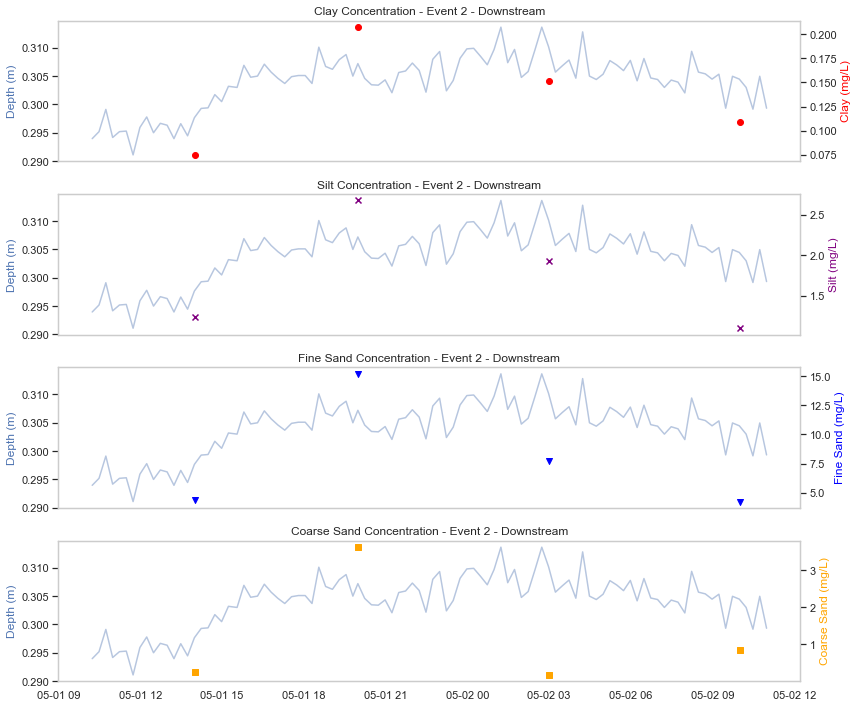

In [34]:
sns.set(style='whitegrid')
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# plot for clay
axs[0].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_clay = axs[0].twinx()
axs_clay.scatter(filtered_GSD['datetime'], filtered_GSD['Clay'], c='red', marker='o', label='Clay (mg/L)', zorder=3)
axs_clay.set_ylabel('Clay (mg/L)', color='red')
axs[0].set_title('Clay Concentration - Event 2 - Downstream')
# plot for silt
axs[1].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_silt = axs[1].twinx()
axs_silt.scatter(filtered_GSD['datetime'], filtered_GSD['Silt'], c='purple', marker='x', label='Silt (mg/L)', zorder=4)
axs_silt.set_ylabel('Silt (mg/L)', color='purple')
axs[1].set_title('Silt Concentration - Event 2 - Downstream')
# plot for fine sand
axs[2].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_fine_sand = axs[2].twinx()
axs_fine_sand.scatter(filtered_GSD['datetime'], filtered_GSD['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)', zorder=5)
axs_fine_sand.set_ylabel('Fine Sand (mg/L)', color='blue')
axs[2].set_title('Fine Sand Concentration - Event 2 - Downstream')
# plot for coarse sand
axs[3].plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
axs_coarse_sand = axs[3].twinx()
axs_coarse_sand.scatter(filtered_GSD['datetime'], filtered_GSD['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)', zorder=6)
axs_coarse_sand.set_ylabel('Coarse Sand (mg/L)', color='orange')
axs[3].set_title('Coarse Sand Concentration - Event 2 - Downstream')
# set labels
plt.xlabel('Date Time')
axs[0].set_ylabel('Depth (m)', color='b')
axs[1].set_ylabel('Depth (m)', color='b')
axs[2].set_ylabel('Depth (m)', color='b')
axs[3].set_ylabel('Depth (m)', color='b')
# no grid
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
axs_clay.grid(False)
axs_silt.grid(False)
axs_fine_sand.grid(False)
axs_coarse_sand.grid(False)

plt.tight_layout()
plt.show()

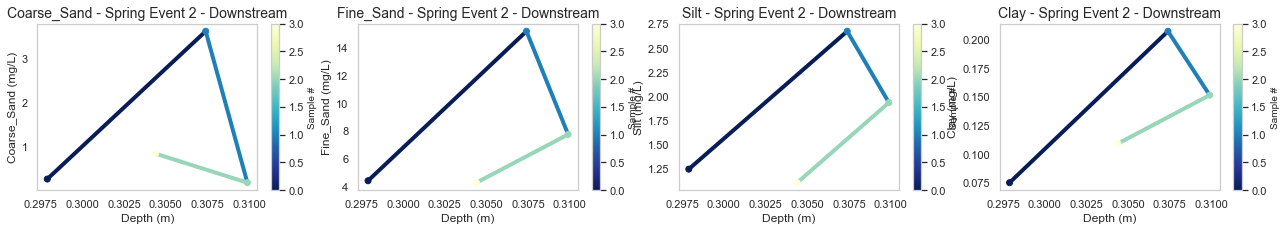

In [35]:
# All grain sizes - storm 4
sizes = ['Coarse_Sand', 'Fine_Sand', 'Silt', 'Clay']
fig, axs = plt.subplots(1, len(sizes), figsize=(4.5*len(sizes), 3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, size in zip(axs, sizes):
    if size not in filtered_GSD.columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(filtered_GSD['P3']))
    num_points = len(filtered_GSD['P3'])
    colorline(filtered_GSD['P3'], filtered_GSD[size], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(filtered_GSD['P3'], filtered_GSD[size], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{size} - Spring Event 2 - Downstream', fontsize=14)
    ax.set_ylabel(f"{size} (mg/L)", fontsize=12)
    ax.set_xlabel("Depth (m)", fontsize=12)

plt.show()

Upstream

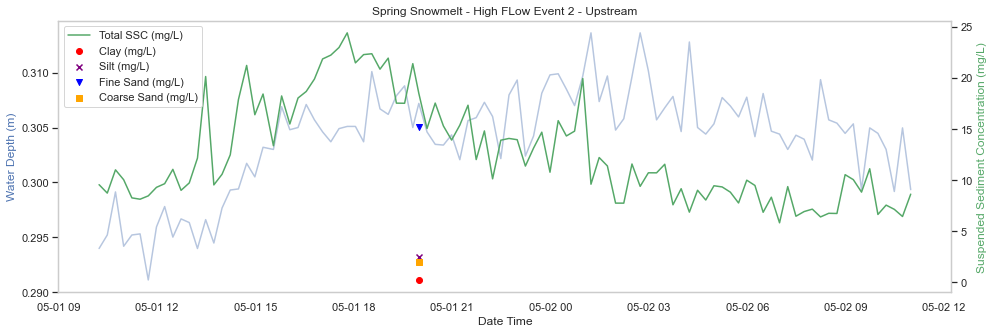

In [37]:
storm_start_date = "2023-05-01 10:00:00"
storm_end_date = "2023-05-02 11:00:00"   

filtered_SSC = SSC_SP23[(SSC_SP23['Date_Time'] >= storm_start_date) & (SSC_SP23['Date_Time'] <= storm_end_date)]
filtered_GSD = GSD_SP23_up[(GSD_SP23_up['datetime'] >= storm_start_date) & (GSD_SP23_up['datetime'] <= storm_end_date)]

# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Water Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Spring Snowmelt - High FLow Event 2 - Upstream')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

##### Event 3

Downstream

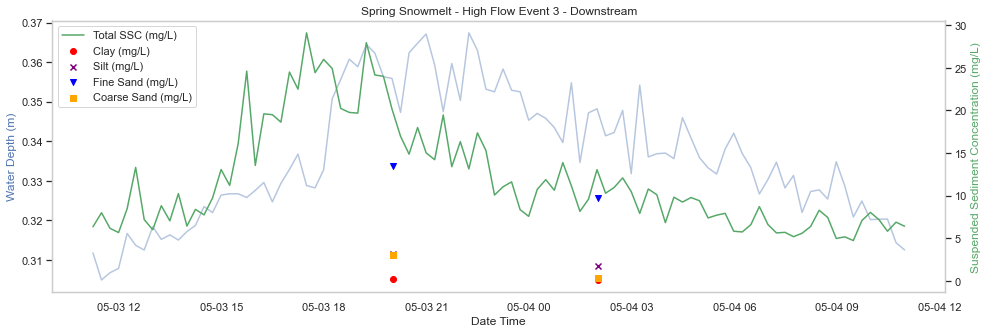

In [39]:
storm_start_date = "2023-05-03 11:00:00"
storm_end_date = "2023-05-04 11:00:00"   

filtered_SSC = SSC_SP23[(SSC_SP23['Date_Time'] >= storm_start_date) & (SSC_SP23['Date_Time'] <= storm_end_date)]
filtered_GSD = GSD_SP23_down[(GSD_SP23_down['datetime'] >= storm_start_date) & (GSD_SP23_down['datetime'] <= storm_end_date)]

# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Water Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Spring Snowmelt - High Flow Event 3 - Downstream')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

Upstream

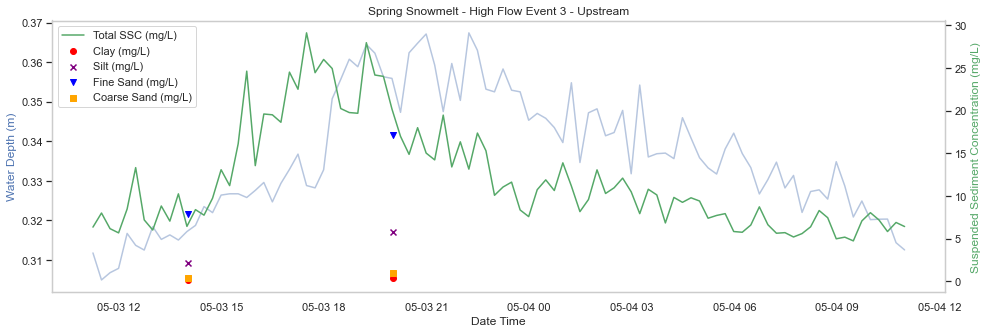

In [41]:
storm_start_date = "2023-05-03 11:00:00"
storm_end_date = "2023-05-04 11:00:00"   

filtered_SSC = SSC_SP23[(SSC_SP23['Date_Time'] >= storm_start_date) & (SSC_SP23['Date_Time'] <= storm_end_date)]
filtered_GSD = GSD_SP23_up[(GSD_SP23_up['datetime'] >= storm_start_date) & (GSD_SP23_up['datetime'] <= storm_end_date)]

# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Water Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Spring Snowmelt - High Flow Event 3 - Upstream')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

##### Event 4

Downstream

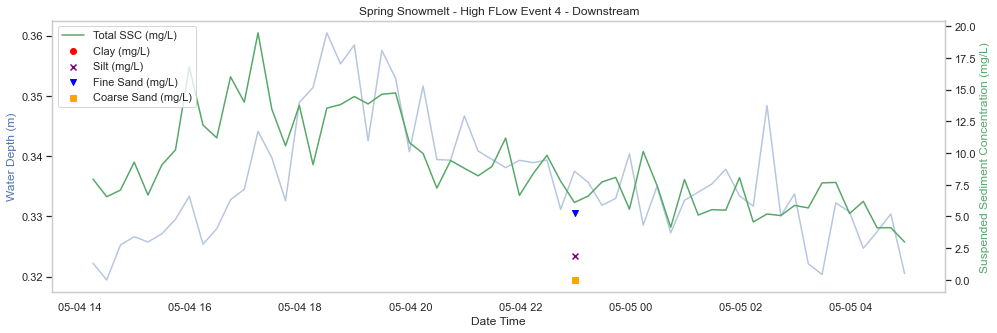

In [42]:
storm_start_date = "2023-05-04 14:00:00"
storm_end_date = "2023-05-05 05:00:00"   

filtered_SSC = SSC_SP23[(SSC_SP23['Date_Time'] >= storm_start_date) & (SSC_SP23['Date_Time'] <= storm_end_date)]
filtered_GSD = GSD_SP23_down[(GSD_SP23_down['datetime'] >= storm_start_date) & (GSD_SP23_down['datetime'] <= storm_end_date)]

# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Water Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Spring Snowmelt - High FLow Event 4 - Downstream')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()

Upstream

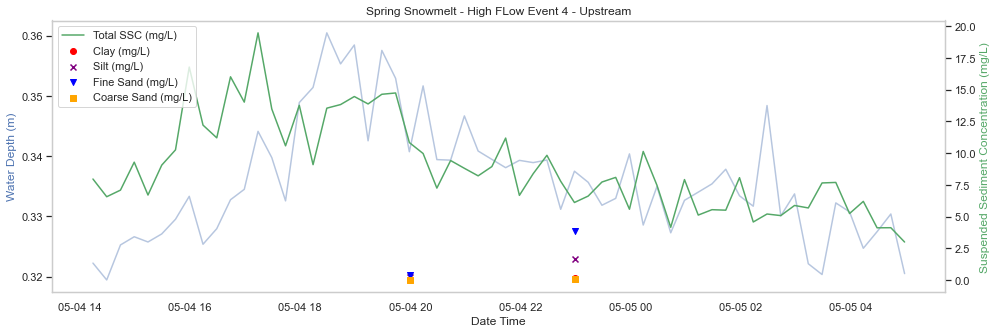

In [43]:
storm_start_date = "2023-05-04 14:00:00"
storm_end_date = "2023-05-05 05:00:00"   

filtered_SSC = SSC_SP23[(SSC_SP23['Date_Time'] >= storm_start_date) & (SSC_SP23['Date_Time'] <= storm_end_date)]
filtered_GSD = GSD_SP23_up[(GSD_SP23_up['datetime'] >= storm_start_date) & (GSD_SP23_up['datetime'] <= storm_end_date)]

# plot turbidity and SSC concentration time series for both seasons 
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(filtered_SSC['Date_Time'], filtered_SSC['P3'], 'b-', alpha=0.4, zorder=1)
ax2 = ax.twinx()  # create a second y-axis for the SSC concentration
ax2.plot(filtered_SSC['Date_Time'], filtered_SSC['SSC (mg/L)'], 'g-', label='Total SSC (mg/L)', zorder=2)
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Clay'], c='red', marker='o', label='Clay (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Silt'], c='purple', marker='x', label='Silt (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Fine_Sand'], c='blue', marker='v', label='Fine Sand (mg/L)')
ax2.scatter(filtered_GSD['datetime'], filtered_GSD['Coarse_Sand'], c='orange', marker='s', label='Coarse Sand (mg/L)')

ax.set_xlabel('Date Time')
ax.set_ylabel('Water Depth (m)', color='b')
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color='g')
ax.set_title('Spring Snowmelt - High FLow Event 4 - Upstream')
ax2.legend(loc='upper left') 
ax.grid(False)
ax2.grid(False)

plt.show()